# <span style="color:transparent;">1. Project description and Import Libraries</span>

<div style="
    background: #e6f2ec;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Merriweather', serif; font-size: 43px; font-weight: 600; margin: 0;">
        Project description and Import Libraries
    </div>
</div>


<div style="
    background: #f1f7f4;
    border-left: 5px solid #6e9e89;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'Georgia', serif;
    line-height: 1.6;">
    <h3 style="margin-top: 0; color: #1a1a1a; font-size: 26px;">🎯 Цель проекта (RU)</h3>
    <p>Цель проекта — провести практический анализ транзакционных данных интернет-магазина, чтобы:</p>
    <ul>
        <li>отработать навыки <strong>предобработки и очистки данных</strong> (пропуски, дубликаты, возвраты, аномалии);</li>
        <li>рассчитать <strong>базовые продуктовые и бизнес-метрики</strong>, такие как GMV, AOV, LTV, Items per Order;</li>
        <li>изучить поведение клиентов во времени с помощью <strong>когортного анализа</strong>;</li>
        <li>провести <strong>A/B тестирование</strong> с логарифмированием, Z-тестами и бутстрэпом;</li>
        <li>визуализировать всё в <strong>финальном BI-дашборде</strong>.</li>
    </ul>
    <p>Данный проект — это не просто EDA, а попытка пройти <strong>весь аналитический цикл</strong>: от грязных данных до проверенных гипотез и бизнес-выводов.</p>
    <p>Поскольку анализируемый интернет-магазин расположен в Великобритании, все денежные значения указаны в фунтах стерлингов (£).</p>
<p>По ссылке вы можете ознакомиться с итоговым дашбордом: <a href="https://datalens.yandex/ufzmzv2mtqxwg" target="_blank">Смотреть дашборд</a></p>
    <hr style="margin: 30px 0; border: none; border-top: 1px solid #ccc;">
    <h3 style="color: #1a1a1a; font-size: 26px;">🎯 Project Goal (EN)</h3>
    <p>The goal of this project is to conduct a practical analysis of real-world e-commerce transaction data, focusing on:</p>
    <ul>
        <li>applying <strong>data cleaning and preprocessing</strong> techniques (handling missing values, duplicates, returns, outliers);</li>
        <li>calculating key <strong>product and business metrics</strong> such as GMV, AOV, LTV, and Items per Order;</li>
        <li>performing <strong>cohort analysis</strong> to understand customer behavior over time;</li>
        <li>running <strong>A/B tests</strong> using log transformations, Z-tests, and bootstrapping;</li>
        <li>building a final <strong>BI dashboard</strong> for business reporting and insights.</li>
    </ul>
    <p>This project goes beyond EDA — it aims to replicate a <strong>complete analytical cycle</strong> from raw data to business-ready insights.</p>
    <p>Since the analyzed e-commerce site is based in the UK, all monetary values are presented in British pounds (£)</p>
    
<p>You can view the final dashboard here: <a href="https://datalens.yandex/ufzmzv2mtqxwg" target="_blank">View dashboard</a></p>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
#pd.options.display.float_format ='{:,.2f}'.format

# <span style="color:transparent;">2. Data Preview and Data Quality Checks</span>

<div style="
    background: #e6f2ec;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Merriweather', serif; font-size: 43px; font-weight: 600; margin: 0;">
        Data Preview and Data Quality Checks
    </div>
</div>


In [2]:
df = pd.read_csv('/kaggle/input/e-commerce-analysis-uk/data.csv', encoding = 'windows-1251', 
                 names = ['Invoice_No', 'Stock_Code', 'Description', 'Quantity', 'Invoice_Date', 'Unit_Price', 'Customer_ID', 'Country'],
                 skiprows = 1, 
                 dtype = {'Customer_ID':'object'})

df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'], format='%m/%d/%Y %H:%M')


df.head(3)

,Invoice_No,Stock_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom


In [3]:
df.describe().round(0)

,Quantity,Invoice_Date,Unit_Price
count,541909.0,541909,541909.0
mean,10.0,2011-07-04 13:34:57.156386048,5.0
min,-80995.0,2010-12-01 08:26:00,-11062.0
25%,1.0,2011-03-28 11:34:00,1.0
50%,3.0,2011-07-19 17:17:00,2.0
75%,10.0,2011-10-19 11:27:00,4.0
max,80995.0,2011-12-09 12:50:00,38970.0
std,218.0,NaN,97.0


In [4]:
df.describe(include='object')

,Invoice_No,Stock_Code,Description,Customer_ID,Country
count,541909,541909,540455,406829,541909
unique,25900,4070,4223,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841,United Kingdom
freq,1114,2313,2369,7983,495478


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoice_No    541909 non-null  object        
 1   Stock_Code    541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   Invoice_Date  541909 non-null  datetime64[ns]
 5   Unit_Price    541909 non-null  float64       
 6   Customer_ID   406829 non-null  object        
 7   Country       541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.duplicated().sum()

5268

In [7]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [8]:
# Сначала отбираем строки, где только буквы и цифры
is_alphanum = df['Stock_Code'].str.match(r'^[A-Za-z\d]+$')

# Потом фильтруем те, где не более одной цифры
has_max_one_digit = df['Stock_Code'].str.count(r'\d') <= 1

# Применяем оба условия
result = df[is_alphanum & has_max_one_digit]
result['Stock_Code'].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [9]:
result[['Stock_Code','Description']].drop_duplicates()

,Stock_Code,Description
45,POST,POSTAGE
141,D,Discount
1387,C2,CARRIAGE
1778,DOT,DOTCOM POSTAGE
2195,M,Manual
14179,S,SAMPLES
14256,AMAZONFEE,AMAZON FEE
39885,m,Manual
51721,POST,NaN
83213,DCGSSBOY,BOYS PARTY BAG


---
#### Находим по Stock_Code и Description что не относится к продажам и выпиливаем
#### We use the Stock_Code and Description to find what doesn't apply to sales and cut it out ⬇
---

In [10]:
non_products = ['C2', 'POST', 'DOT', 'M', 'm', 'S', 'AMAZONFEE', 'B']
non_products_description = ['check', 'damages', 'damaged', '?', 
    'Discount', 'Bank Charges', '? sold as sets?', '??', '?? missing',
    '???', '????damages????', '????missing', '???lost', '???missing',
    '?display?', '?lost', '?missing', '?sold as sets?', 'CHECK',
    '20713 wrongly marked', 'Breakages', 'Crushed', 'DAMAGED', 'Dagamed',
    'Damaged', 'Damages', 'Damages/samples', 'Display', 'Dotcom',
    'Dotcom sales', 'Dotcom set', "Dotcom sold in 6's", 'Given away',
    'Incorrect stock entry.', 'MERCHANT CHANDLER CREDIT ERROR, STO',
    'MIA', 'Missing', 'Not rcvd in 10/11/2010 delivery', 'OOPS ! adjustment',
    'Show Samples', 'Sold as 1 on dotcom', 'Water damaged', 'Wet pallet-thrown away',
    'Wrongly mrked had 85123a in box', 'adjust', 'barcode problem', 'broken', "can't find", 
    'code mix up? 84930', 'counted', 'cracked', 'crushed', 'crushed boxes', 'crushed ctn', 'damaged stock',
    'damages wax', 'damages/credits from ASOS.', 'damages/display',
    'damages/dotcom?', 'damages/showroom etc', 'damages?', 'dotcom sales',
    'dotcom sold sets', 'ebay', 'faulty', 'found some more on shelf', 'historic computer difference?....se', 'incorrect stock entry.',
    'incorrectly made-thrown away.', 'incorrectly put back into stock',
    'label mix up', 'lost', 'lost in space', 'lost??', 'missing',
    'missing?', 'mix up with c', 'mixed up', 'mouldy',
    'mouldy, thrown away.', 'mouldy, unsaleable.',
    'mystery! Only ever imported 1800', 'printing smudges/thrown away',
    're dotcom quick fix.', 're-adjustment', 'reverse 21/5/10 adjustment', 'reverse previous adjustment', 
    'rusty throw away', 'rusty thrown away','samples', 'samples/damages', 'showroom', 'smashed', 'sold as 1',
    'sold as 22467', 'sold as set by dotcom', 'sold as set on dotcom', 'sold as set on dotcom and amazon',
    'sold as set/6 by dotcom', 'sold in set?', 'sold with wrong barcode',
    'stock check', 'stock creditted wrongly', 'taig adjust no stock',
    'temp adjustment', 'throw away', 'thrown away',
    "thrown away-can't sell", "thrown away-can't sell.", 'water damage',
    'water damaged', 'wet', 'wet boxes', 'wet damaged', 'wet pallet',
    'wet rusty', 'wet/rusty', 'wet?', 'wrong barcode', 'wrong barcode (22467)',
    'wrong code', 'wrong code?', 'wrongly coded-23343',
    'wrongly marked carton 22804', 'wrongly marked. 23343 in box',
    'wrongly sold as sets', 'wrongly sold sets']


#df = df[~df['Stock_Code'].isin(non_products)].reset_index(drop=True)
#df = df[~df['Description'].isin(non_products_description)].reset_index(drop=True)
df = df[(~df['Stock_Code'].isin(non_products)) & (~df['Description'].isin(non_products_description))].reset_index()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533254 entries, 0 to 533253
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         533254 non-null  int64         
 1   Invoice_No    533254 non-null  object        
 2   Stock_Code    533254 non-null  object        
 3   Description   531806 non-null  object        
 4   Quantity      533254 non-null  int64         
 5   Invoice_Date  533254 non-null  datetime64[ns]
 6   Unit_Price    533254 non-null  float64       
 7   Customer_ID   399709 non-null  object        
 8   Country       533254 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 36.6+ MB


---
#### Из исхоного датафрейма были убраны только операции, не относящиеся к продуктовой части, а также удалены полные дубликаты (которые предположительно были расценены как баги в системе/задвоение)
#### Only operations that were not related to the product part were removed from the original dataframe, as well as complete duplicates (which were presumably regarded as bugs in the system/duplication) were removed
---

In [12]:
df['Month'] = df['Invoice_Date'].dt.to_period('M').dt.to_timestamp()
df['Total'] = df['Quantity'] * df['Unit_Price']
df['is_return'] = df['Quantity'] < 0

df_clean = df[(df['Quantity'] > 0) & (df['Unit_Price'] > 0)]

---
#### Определяем дубликаты по конкретным колонкам, чтобы понять где один заказ разбит на несколько строк и объединить их 
#### We identify duplicates by specific columns in order to understand where one order is divided into several rows and combine them ⬇
---

In [13]:
df_clean.duplicated(subset=['Invoice_No', 'Stock_Code', 'Invoice_Date']).sum()

5241

In [14]:
df_clean_grouped = df_clean.groupby(['Invoice_No', 'Stock_Code'], as_index=False).agg({
    'Quantity': 'sum',
    'Total': 'sum',
    'Description': 'first',      
    'Unit_Price': 'first',       
    'Customer_ID': 'first',
    'Country': 'first',
    'Invoice_Date': 'first'
})

---
#### Убеждаемся, что дуликатов после группировки не осталось 
#### Making sure that there are no duplicates left after grouping ⬇
---

In [15]:
df_clean_grouped.duplicated(subset=['Invoice_No', 'Stock_Code', 'Invoice_Date']).sum()

0

---

<div style="margin-top: 0; color: #1a1a1a; font-size: 18px; font-weight: bold; margin-bottom: 15px;">
  Применяем Winsorisation метод вместо удаления аномалий для того, чтобы не потерять customer_id и не исказить картину при когортном анализе и также избежать серьезного влияния на значения метрик
Предварительно было высчитано, что при очистке данных через 0,99-квантиль или IQR*3 теряется от 6500 до 29000 строк, (от 1,5% до 5,5%) соответственно, что было расценено как значительная потеря данных для предстоящего анализа
</div>

<div style="margin-top: 0; color: #1a1a1a; font-size: 18px; font-weight: bold; margin-bottom: 15px;">
We use the Winsorization method instead of deleting anomalies in order to avoid losing the customer ID and distorting the picture during cohort analysis, as well as avoiding a significant impact on metric values.
Previously, it was calculated that when deleting data after the 0.99 percentile or IQR * 3, between 6,500 and 29,000 rows (1.5% and 5.5%) were lost, which was considered a significant data loss for future analysis.
</div>

---

In [16]:
# ==== Winsorizing Unit_Price ====
q01_Unit_Price = df_clean_grouped['Unit_Price'].quantile(q=0.01)
q99_Unit_Price = df_clean_grouped['Unit_Price'].quantile(q=0.99)
df_clean_grouped['Unit_Price_Winsor'] = df_clean_grouped['Unit_Price'].clip(lower=q01_Unit_Price, upper=q99_Unit_Price)

# ==== Winsorizing Quantity ====
q01_Quantity = df_clean_grouped['Quantity'].quantile(q=0.01)
q99_Quantity = df_clean_grouped['Quantity'].quantile(q=0.99)
df_clean_grouped['Quantity_Winsor'] = df_clean_grouped['Quantity'].clip(lower=q01_Quantity, upper=q99_Quantity)

# ==== Calculating Total_Winsor ====
df_clean_grouped['Total_Winsor'] = df_clean_grouped['Quantity_Winsor'] * df_clean_grouped['Unit_Price_Winsor']


In [17]:
df_clean_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517323 entries, 0 to 517322
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice_No         517323 non-null  object        
 1   Stock_Code         517323 non-null  object        
 2   Quantity           517323 non-null  int64         
 3   Total              517323 non-null  float64       
 4   Description        517323 non-null  object        
 5   Unit_Price         517323 non-null  float64       
 6   Customer_ID        386329 non-null  object        
 7   Country            517323 non-null  object        
 8   Invoice_Date       517323 non-null  datetime64[ns]
 9   Unit_Price_Winsor  517323 non-null  float64       
 10  Quantity_Winsor    517323 non-null  int64         
 11  Total_Winsor       517323 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 47.4+ MB


<div style="margin-top: 0; color: #1a1a1a; font-size: 20px; font-weight: bold; margin-bottom: 15px;">
  Log-Boxplots: Before vs After Anomaly Handling
</div>


In [18]:
plt.style.use('ggplot')

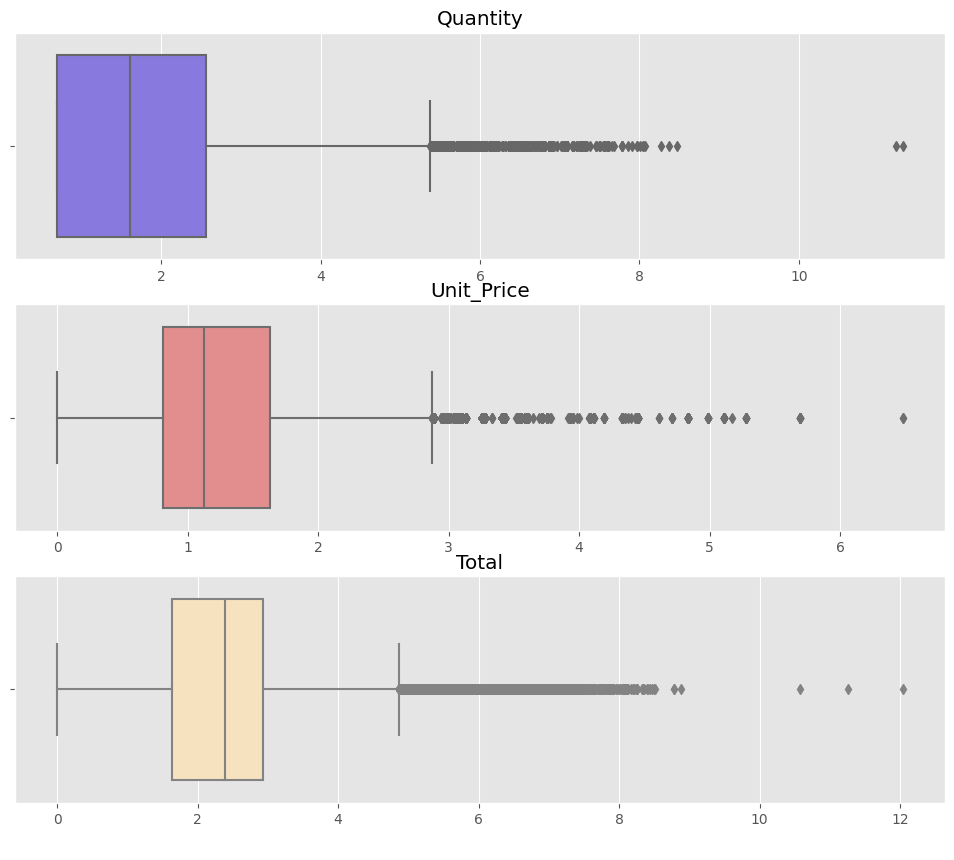

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,10))

sns.boxplot(x=np.log1p(df_clean_grouped['Quantity']), ax=axes[0], color='mediumslateblue')
axes[0].set_title('Quantity')
axes[0].set_xlabel(' ')

sns.boxplot(x=np.log1p(df_clean_grouped['Unit_Price']), ax=axes[1], color='lightcoral')
axes[1].set_title('Unit_Price')
axes[1].set_xlabel(' ')

sns.boxplot(x=np.log1p(df_clean_grouped['Total']), ax=axes[2], color='moccasin')
axes[2].set_title('Total')
axes[2].set_xlabel(' ');

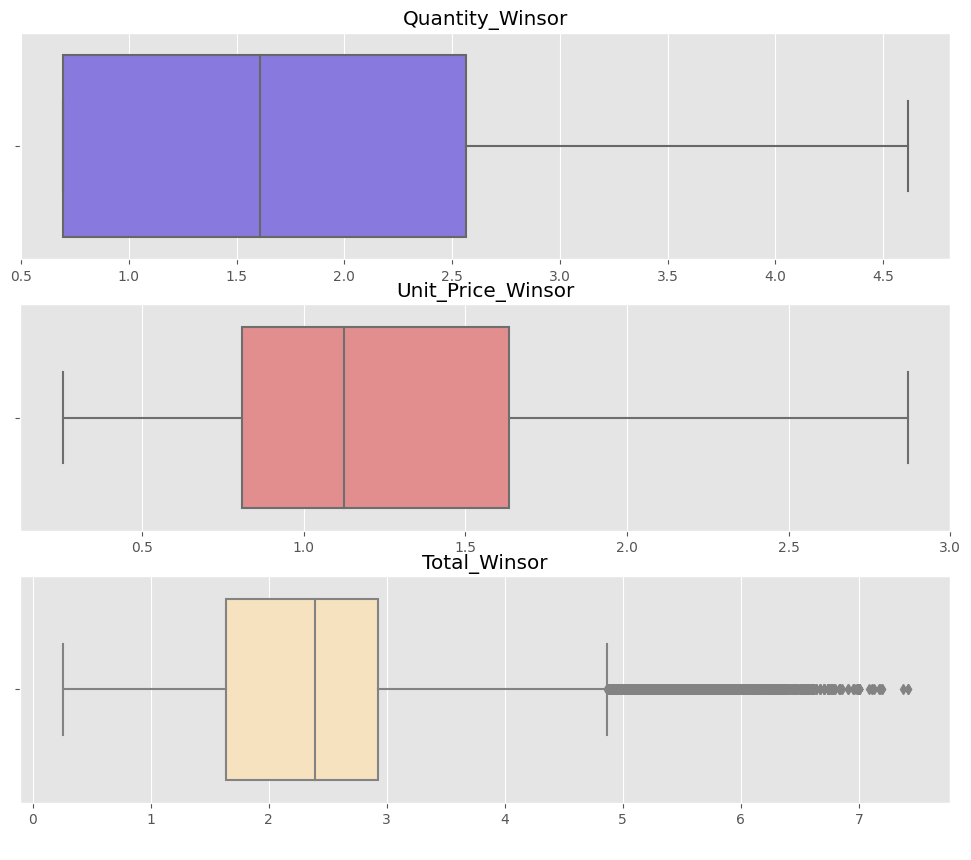

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,10))

sns.boxplot(x=np.log1p(df_clean_grouped['Quantity_Winsor']), ax=axes[0], color='mediumslateblue')
axes[0].set_title('Quantity_Winsor')
axes[0].set_xlabel(' ')

sns.boxplot(x=np.log1p(df_clean_grouped['Unit_Price_Winsor']), ax=axes[1], color='lightcoral')
axes[1].set_title('Unit_Price_Winsor')
axes[1].set_xlabel(' ')

sns.boxplot(x=np.log1p(df_clean_grouped['Total_Winsor']), ax=axes[2], color='moccasin')
axes[2].set_title('Total_Winsor')
axes[2].set_xlabel(' ');

---

<div style="margin-top: 0; color: #1a1a1a; font-size: 18px; font-weight: bold; margin-bottom: 15px;">
Создаём финальные датафреймы для работы, где df_final - для общей работы, df_known - для работы с известными ID
The final dataframes have been created for work. Here, df_final is used for general work and df_known is used for working with known IDs ⬇
</div>

---

In [21]:
df_final = df_clean_grouped[['Invoice_Date', 'Customer_ID', 'Invoice_No', 'Stock_Code', 
                             'Unit_Price_Winsor', 'Quantity_Winsor', 'Total_Winsor', 'Description', 'Country']].copy()
df_final['Customer_ID'].fillna('unknown', inplace=True)

df_known = df_final[df_final['Customer_ID'] != 'unknown'].reset_index(drop=True)

---

<div style="margin-top: 0; color: #1a1a1a; font-size: 18px; font-weight: bold; margin-bottom: 15px;">
Так как:
    
- Данные сильно несимметричны (даже после winsorization)
- Quantity и Unit_Price — не подчиняются нормальному распределению
- Зависимость не линейна (например: при росте цены количество снижается, но не прямо пропорционально)
- Spearman точнее и уместнее
</div>

<div style="margin-top: 0; color: #1a1a1a; font-size: 18px; font-weight: bold; margin-bottom: 15px;">
 Since:
    
- The data is highly unbalanced, even after winsorization, and the quantity and unit price do not follow a normal distribution, the relationship between the two variables is not linear. As the price increases, the quantity decreases, but this decrease is not directly proportional.
- Therefore, Spearman's rank correlation coefficient is more appropriate for this dataset.
</div>
---

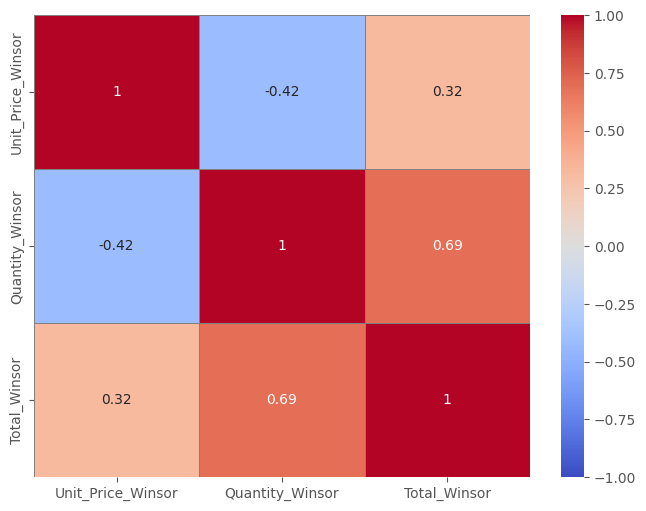

In [22]:
corr_sp = df_final.corr('spearman', numeric_only=True).round(2)

plt.figure(figsize=(8,6))
sns.heatmap(corr_sp, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=0.7, linecolor='grey');

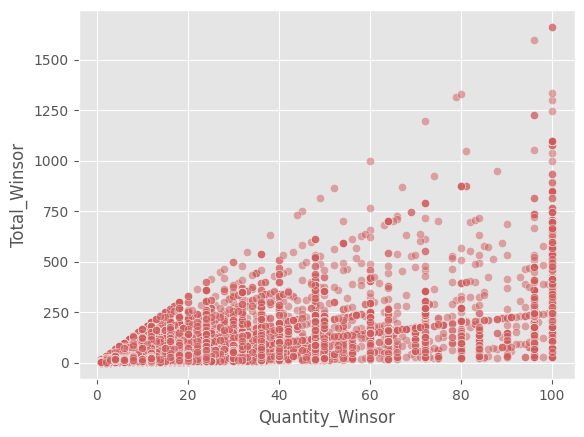

In [23]:
sns.scatterplot(df_final, x='Quantity_Winsor', y='Total_Winsor', color='indianred', alpha=0.5);

---

| Пара                       | Спирмен   | Что это значит?                                                      |
| -------------------------- | --------- | -------------------------------------------------------------------- |
| **Unit\_Price ↔ Quantity** | **-0.42** | Чем выше цена, тем меньше покупают (монотонно уменьшается)           |
| **Quantity ↔ Total**       | **+0.69** | Больше покупают — выше чек (логично, но не 1.0, значит есть разброс) |
| **Unit\_Price ↔ Total**    | **+0.32** | При росте цены чек растёт, но **слабее**, чем от количества          |

#### Выводы по Spearman корреляциям

1. **Цена и количество — обратно связаны**
   Люди берут меньше, когда дороже (**-0.42**). Важно: большой чек ≠ много штук.

2. **Чек больше зависит от количества, чем от цены**

   * Quantity ↔ Total: **+0.69**
   * Price ↔ Total: **+0.32**
     → Клиенты чаще берут больше, чем дороже.

Вероятно, в датасете поведение покупателей чаще определяется тем, **сколько они берут**, а не **насколько дорогой товар**.

---

#### Conclusions on Spearman correlations

1. **Price vs Quantity = inverse link**
   People buy less when it's pricier (**-0.42**). Big total ≠ many items.

2. **Total depends more on quantity than price**

   * Quantity ↔ Total: **+0.69**
   * Price ↔ Total: **+0.32**
     → Users buy **more**, not **pricier**.

Most likely, in the dataset, customer behavior is more often determined by **how much they buy**, rather than **how expensive the product is.**

---


<div style="
    background: #f1f7f4;
    border-left: 5px solid #6e9e89;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'Georgia', serif;
    line-height: 1.6;">
    <div style="margin-top: 0; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
  🧹 Этап ознакомления с данными и их подготовки завершён
</div>
    <ul>
        <li>Удалены пропуски, дубликаты и аномалии (в т.ч. отрицательные цены/кол-ва)</li>
        <li>Исключены нерелевантные строки: возвраты, не-продуктовые заказы, тех. коды</li>
        <li>Данные агрегированы на уровне заказов</li>
        <li>Customer ID очищены и приведены к одному виду</li>
        <li>Форматы данных приведены в порядок</li>
    </ul>
    <p>✅ Готово к построению метрик и анализу поведения пользователей.</p>
    <hr style="margin: 30px 0; border: none; border-top: 1px solid #ccc;">
    <div style="margin-top: 0; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
  🧹 The data review and preparation process has been completed
</div>
    <ul>
        <li>Missing values, duplicates, and anomalies removed (incl. negative prices/quantities)</li>
        <li>Filtered out irrelevant rows: returns, non-product orders, system codes</li>
        <li>Aggregated data to order level</li>
        <li>Customer IDs cleaned and standardized</li>
        <li>Data types properly formatted</li>
    </ul>
    <p>✅ Ready to calculate metrics and analyze user behavior.</p>

</div>


# <span style="color:transparent;">3. The Anatomy of Orders</span>

<div style="
    background: #e6f2ec;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Merriweather', serif; font-size: 43px; font-weight: 600; margin: 0;">
        The Anatomy of Orders
    </div>
</div>


##### Количество уникальных товаров (Number of unique products)
Stock_Code — это уникальный идентификатор товара, то есть артикул.

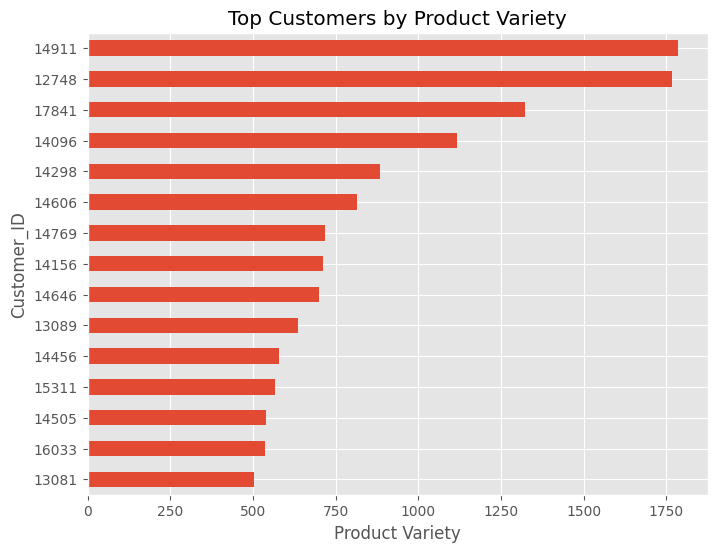

In [24]:
product_variety_by_customer_id = df_final.groupby('Customer_ID')['Stock_Code'].nunique().nlargest(16)[1:].sort_values() # without unknown

product_variety_by_customer_id.plot(kind='barh', figsize=(8,6),
                                   xlabel='Product Variety', ylabel='Customer_ID', title='Top Customers by Product Variety');

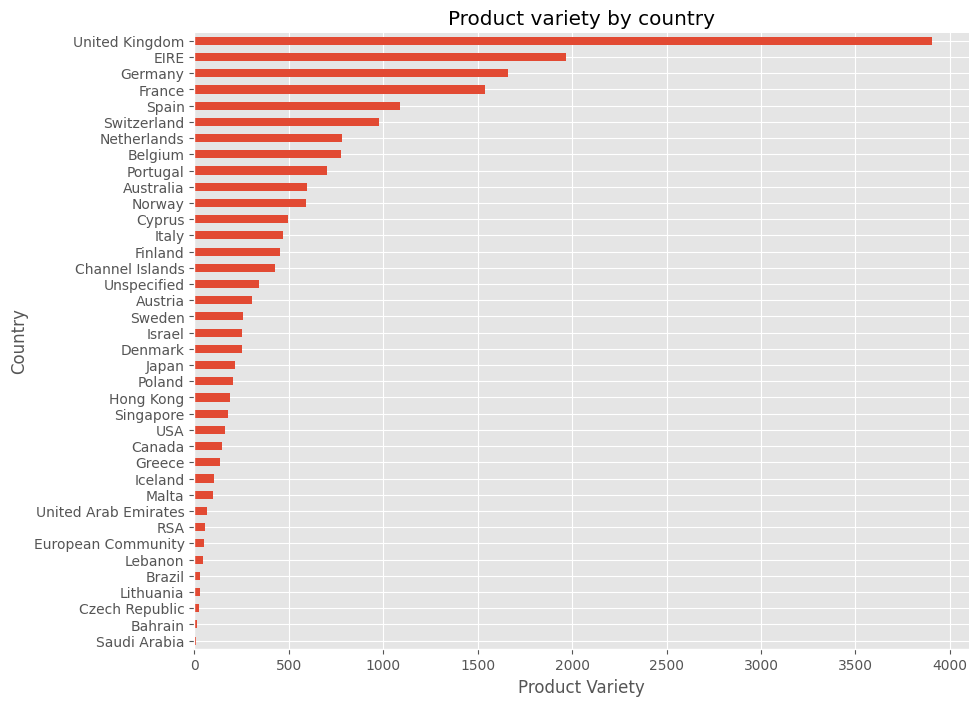

In [25]:
# ассортимент, охваченный страной
product_variety_by_country = df_final.groupby('Country')['Stock_Code'].nunique().sort_values()

plt.figure(figsize=(10,8))
product_variety_by_country.plot(kind='barh', xlabel='Product Variety', ylabel='Country', title='Product variety by country')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

In [26]:
total_unique_products = df_final['Stock_Code'].nunique()
product_variety_pct = product_variety_by_country / total_unique_products * 100
total_unique_products

3913

In [27]:
orders_by_country = df_final.groupby('Country')['Invoice_No'].nunique().sort_values()
orders_by_country.nlargest(5)

Country
United Kingdom    17901
Germany             443
France              382
EIRE                282
Belgium              98
Name: Invoice_No, dtype: int64

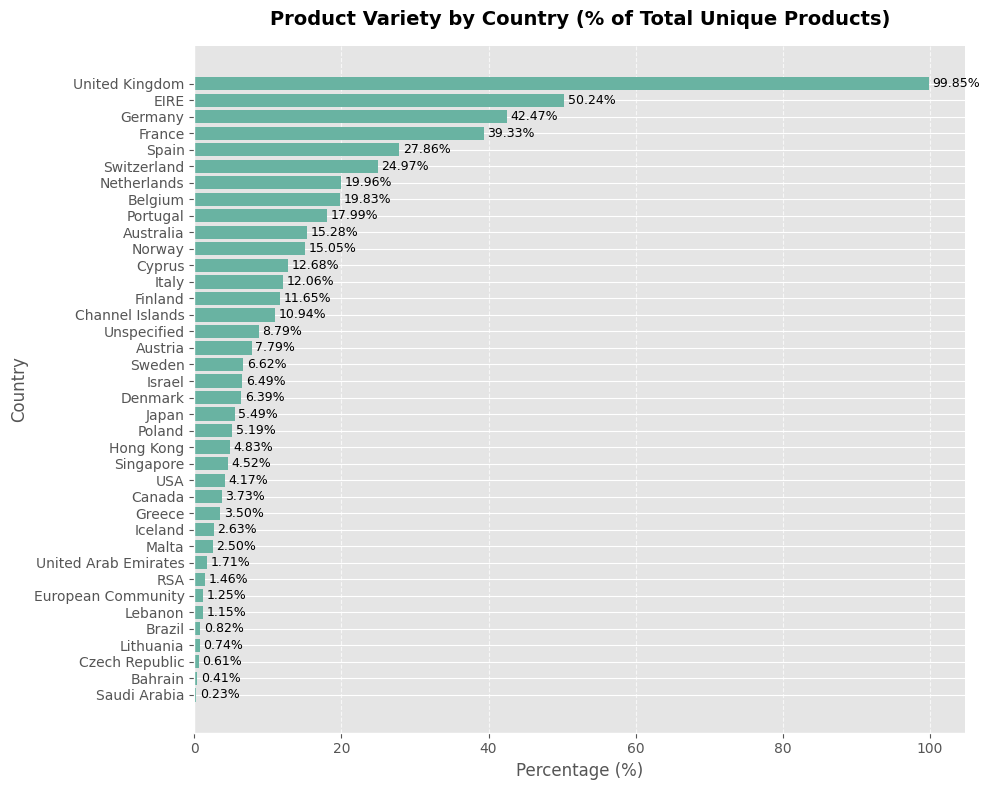

In [28]:
# Процент уникальных товаров по странам
plt.figure(figsize=(10, 8))

bars = plt.barh(product_variety_pct.index, product_variety_pct.values, color="#69b3a2")

plt.title("Product Variety by Country (% of Total Unique Products)", fontsize=14, weight='bold', pad=15)
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Country", fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5,             
             bar.get_y() + bar.get_height()/2,
             f"{width:.2f}%",         
             va='center',
             fontsize=9)

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.tight_layout();


---

<div style="margin-top: 0; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
  Russian:
</div>

1. **Без сюрпризов:**
   Лидирует **Великобритания (UK)** — абсолютно логично, ведь это британский онлайн-ритейлер. В топе также много соседей: **Ирландия (EIRE)**, **Германия**, **Франция**, **Испания**, **Швейцария** — всё рядом и с хорошей логистикой.

2. **Чем дальше от UK — тем меньше разнообразия:**
   Это ожидаемый тренд. Видим, что в страны вроде **Сингапура**, **Гонконга**, **Японии**, **Саудовской Аравии** и **Бразилии** отправлялось гораздо меньше уникальных товаров.

3. **Интересные и неожиданные случаи:**

   * **RSA** (Южно-Африканская Республика) с 57 уникальными товарами — может удивить. На первый взгляд, далёко и логистика сложная. Но, возможно, есть крупные баеры или партнёр.
   * **Channel Islands** — 428 позиций, несмотря на маленький размер — вероятно, за счёт плотных торговых связей.
   * **Unspecified** — 344 — технически не страна, но тоже интересный сигнал: возможно, часть клиентов не указывала страну, либо это оптовые заказы.

4. **Практический вывод:**
   География сильно влияет на бизнес: ассортимент, интерес к продуктам и доступность логистики. Ближайшие к UK страны получают больше товаров, больше заказов — и более разнообразный ассортимент. Это полезно учитывать при анализе рынка или выборе стратегий экспансии.

---

<div style="margin-top: 0; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
  English:
</div>

1. **No surprise at the top:**
   The **United Kingdom** leads, of course — this is a UK-based retailer. Other top countries are close neighbors: **Ireland (EIRE)**, **Germany**, **France**, **Spain**, **Switzerland** — all within efficient shipping distance.

2. **The farther from the UK, the fewer product types:**
   That’s a clear and expected trend. Countries like **Singapore**, **Hong Kong**, **Japan**, **Saudi Arabia**, and **Brazil** show much lower product variety, likely due to shipping complexity or cost.

3. **Some unexpected entries:**

   * **RSA (South Africa)** shows up with 57 unique products — which may seem surprising given the distance. Possibly a few strong B2B buyers?
   * **Channel Islands** punches above its weight with 428 — reflecting close economic ties to the UK.
   * **Unspecified** (344) suggests either missing country data or consolidated/wholesale purchases with no country code.

4. **Takeaway:**
   Geography shapes commerce. Countries close to the UK not only order more but also enjoy **greater product variety**. This is critical to factor into **market analysis, logistics planning, and growth strategies**.

---


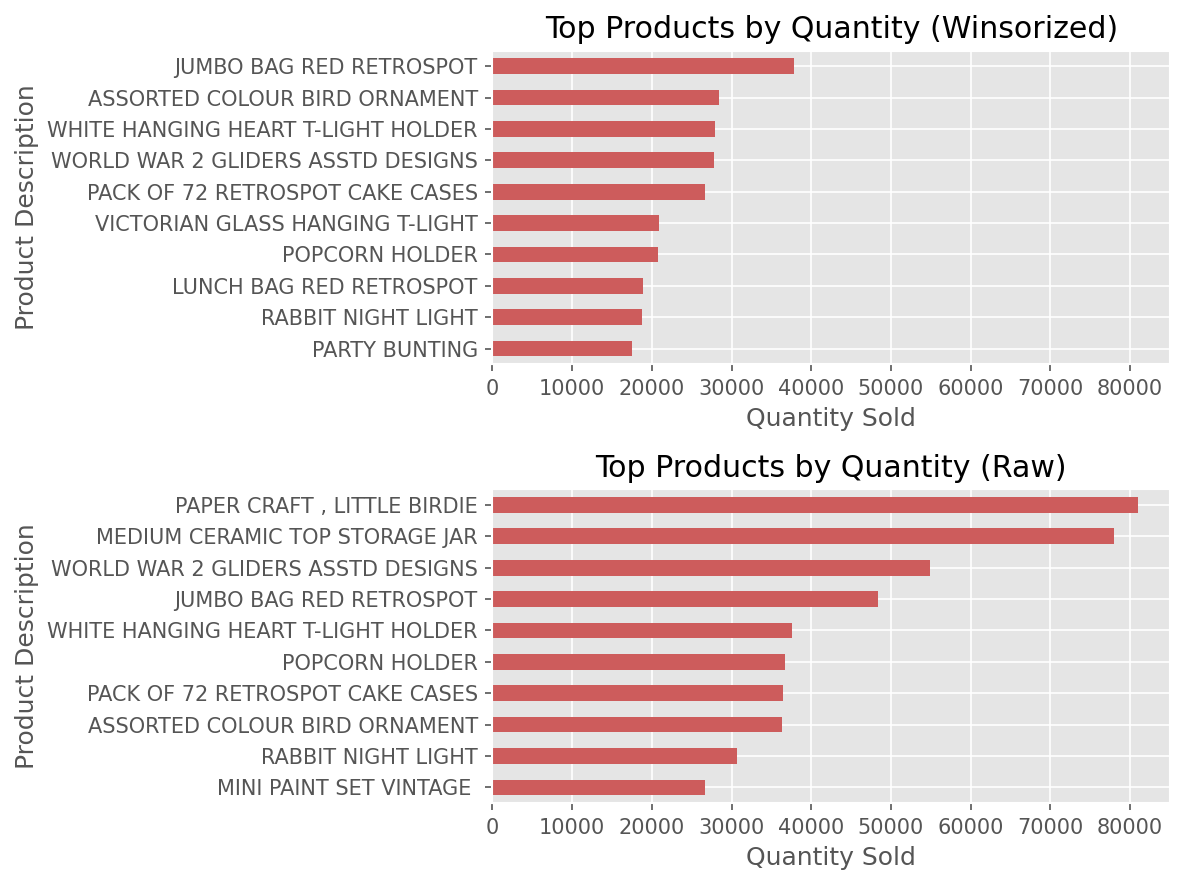

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18,16), dpi=150)

top_quantity_w = df_final.groupby(['Stock_Code', 'Description'])\
['Quantity_Winsor'].sum().nlargest(10).reset_index().sort_values('Quantity_Winsor')

top_quantity_w.plot(
    kind='barh', y='Quantity_Winsor', x='Description', 
    legend=False, figsize=(8, 6), color='indianred', xlim=[0, 85000],
    xlabel='Quantity Sold', ylabel='Product Description', title='Top Products by Quantity (Winsorized)', ax=axes[0])

top_quantity = df_clean_grouped.groupby(['Stock_Code', 'Description'])\
['Quantity'].sum().nlargest(10).reset_index().sort_values('Quantity')

top_quantity.plot(
    kind='barh', y='Quantity', x='Description', 
    legend=False, figsize=(8, 6), color='indianred', xlim=[0, 85000],
    xlabel='Quantity Sold', ylabel='Product Description', title='Top Products by Quantity (Raw)', ax=axes[1])
plt.tight_layout();


---

### 📦 **Conclusions about Top 10 Products by Sales Volume**

#### Russian:

1. **Без винсоризации**
   В этом списке присутствуют товары с экстремально большими продажами (*PAPER CRAFT , LITTLE BIRDIE* — почти 81 000 штук), что может быть связано с **разовыми аномально крупными заказами**. Такие пики искажают общую картину.

2. **С винсоризацией**
   После винсоризации (обрезки аномалий) рейтинг стал ближе к "земле": топ формируют товары с **стабильно высокими, но реалистичными продажами**. Например, *LUNCH BAG RED RETROSPOT* или *VICTORIAN GLASS HANGING T-LIGHT* могли бы быть незаметны без обработки, но на деле продаются хорошо.

3. **Зачем сравнивать оба списка?**

   * *Оригинальный топ* показывает полную картину, включая резкие всплески.
   * *Топ после винсоризации* убирает "шум" и даёт **более достоверное представление** о стабильных хитах продаж.
   * Вместе они помогают понять: **что продаётся регулярно, а что попало в топ случайно.**

---

#### English:

1. **Without Winsorization**
   This top-10 includes extremely high sales numbers — like *PAPER CRAFT , LITTLE BIRDIE* with over 80,000 units — likely caused by **rare, massive bulk orders**. These distort the real picture.

2. **With Winsorization**
   After cutting off outliers, the list becomes more realistic. Products like *LUNCH BAG RED RETROSPOT* or *VICTORIAN GLASS HANGING T-LIGHT* emerge as **consistently strong performers** without extreme anomalies.

3. **Why compare both?**

   * The *raw top list* shows the full volume, but can be heavily skewed.
   * The *winsorized version* provides a **more accurate view of stable, high-selling products**.
   * Used together, they help distinguish between **true bestsellers** and **statistical flukes**.

---


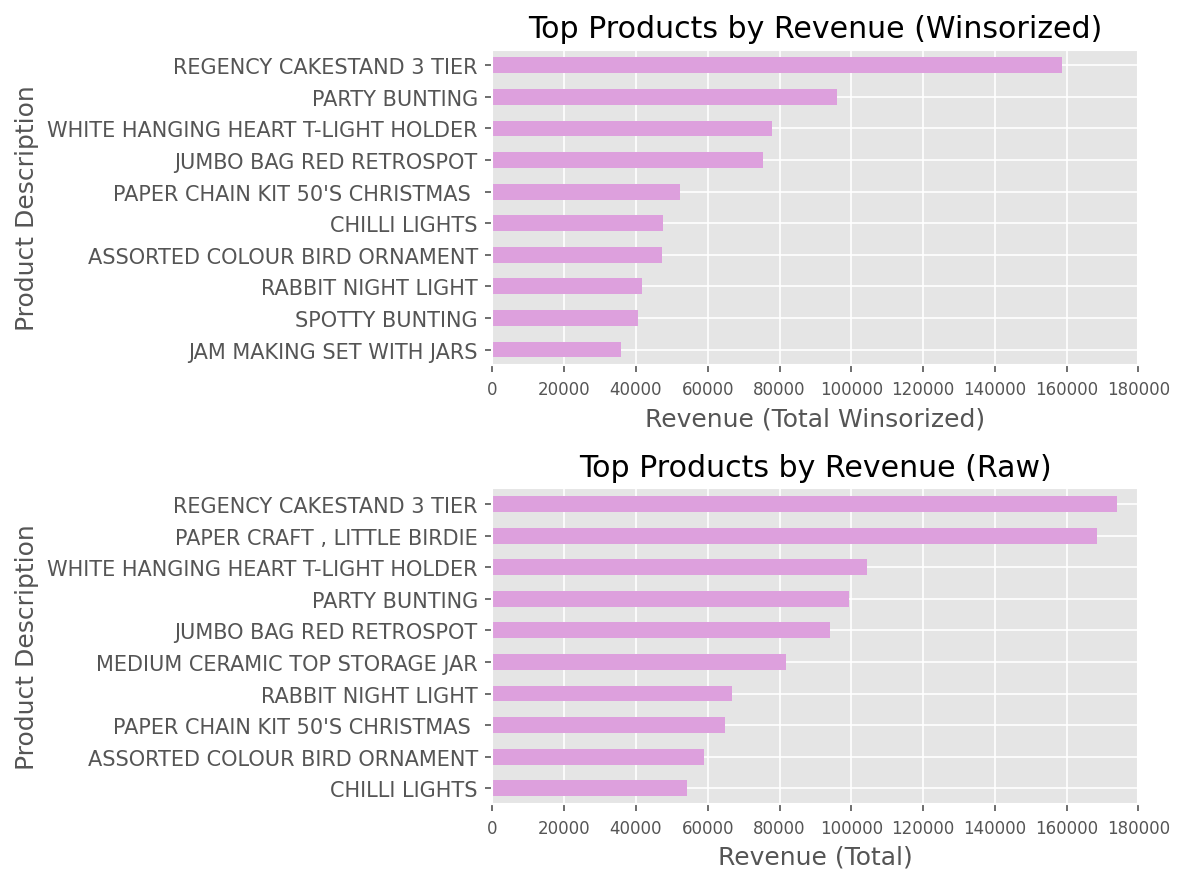

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18,16), dpi=150)

top_Total_w = df_final.groupby(['Stock_Code', 'Description'])\
['Total_Winsor'].sum().nlargest(10).reset_index().sort_values('Total_Winsor')

top_Total_w.plot(
    kind='barh', y='Total_Winsor', x='Description', 
    legend=False, figsize=(8, 6), color='plum', xlim=[0, 180000],
    xlabel='Revenue (Total Winsorized)', ylabel='Product Description', title='Top Products by Revenue (Winsorized)', ax=axes[0])
axes[0].tick_params(axis='x', labelsize=8)

top_Total = df_clean_grouped.groupby(['Stock_Code', 'Description'])\
['Total'].sum().nlargest(10).reset_index().sort_values('Total')

top_Total.plot(
    kind='barh', y='Total', x='Description', 
    legend=False, figsize=(8, 6), color='plum', xlim=[0, 180000], 
    xlabel='Revenue (Total)', ylabel='Product Description', title='Top Products by Revenue (Raw)', ax=axes[1])
axes[1].tick_params(axis='x', labelsize=8)

plt.tight_layout();


---

### 📊 **Conclusions about Top 10 Products by Revenue**

#### Russian:

1. **Без винсоризации**
   В этом списке доминируют товары с высокой суммарной выручкой, но возможными выбросами (например, *REGENCY CAKESTAND 3 TIER* и *PAPER CRAFT , LITTLE BIRDIE*). Они могли попасть в топ благодаря **разовым крупным заказам**.

2. **С винсоризацией**
   Этот список "чище": здесь влияние экстремальных значений ограничено. Продукты вроде *JAM MAKING SET WITH JARS* и *SPOTTY BUNTING* вышли в топ — возможно, за счёт **устойчивых продаж в среднем диапазоне**, а не единичных всплесков.

3. **Зачем показывать оба**

   * **Оригинальный топ** — показывает *реальную выручку*, но может быть искажен.
   * **Винсоризированный топ** — даёт *более устойчивую картину* о том, какие товары стабильно приносят доход без перекоса на редкие заказы.
   * Вместе они позволяют оценить, **какие товары действительно успешны**, а какие попали в топ случайно из-за аномалий.

---

#### English:

1. **Without Winsorization**
   This top-10 reflects raw revenue. Some products (*REGENCY CAKESTAND 3 TIER*, *PAPER CRAFT , LITTLE BIRDIE*) likely dominate due to **single large purchases** or outliers.

2. **With Winsorization**
   This version filters out extreme values. Products like *JAM MAKING SET WITH JARS* and *SPOTTY BUNTING* rank high likely due to **consistent, moderate-volume sales** rather than one-off spikes.

3. **Why show both?**

   * The *raw list* shows **real revenue**, but can be distorted by anomalies.
   * The *winsorized list* gives a **more stable view** of regularly selling products.
   * Together, they help assess which products are **genuinely high-performing** versus those lifted by outliers.

---


#### "Among products sold at least 50 times, which have the highest average price?"

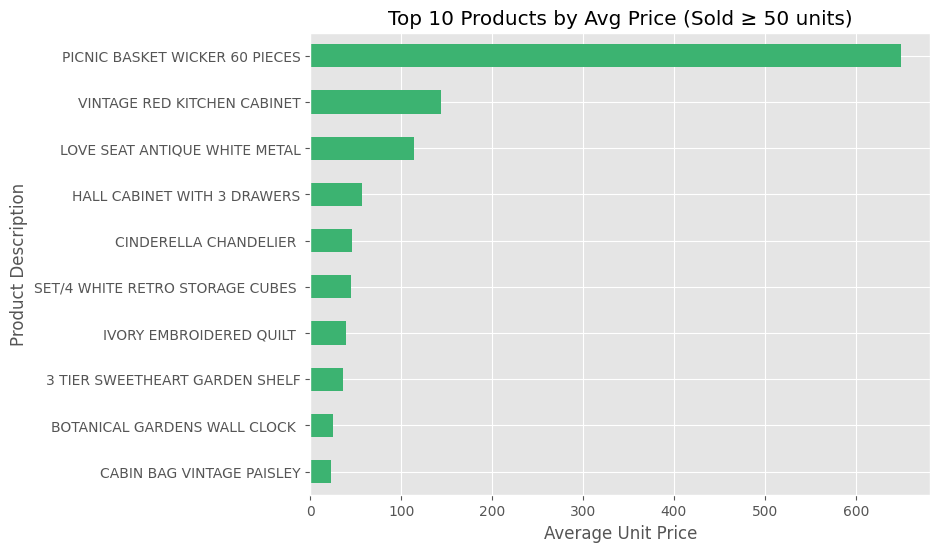

In [31]:
avg_price_by_volume = df_clean_grouped.groupby(['Stock_Code', 'Description']).agg({
    'Unit_Price': 'mean',
    'Quantity': 'sum'
}).reset_index()

filtered_by_volume = avg_price_by_volume[avg_price_by_volume['Quantity'] >= 50]

top_avg_price_volume = filtered_by_volume.sort_values('Unit_Price', ascending=False).head(10)

top_avg_price_volume.sort_values('Unit_Price').plot(
    kind='barh', x='Description', y='Unit_Price',
    figsize=(8, 6), color='mediumseagreen', legend=False,
    xlabel='Average Unit Price', ylabel='Product Description',
    title='Top 10 Products by Avg Price (Sold ≥ 50 units)'
);

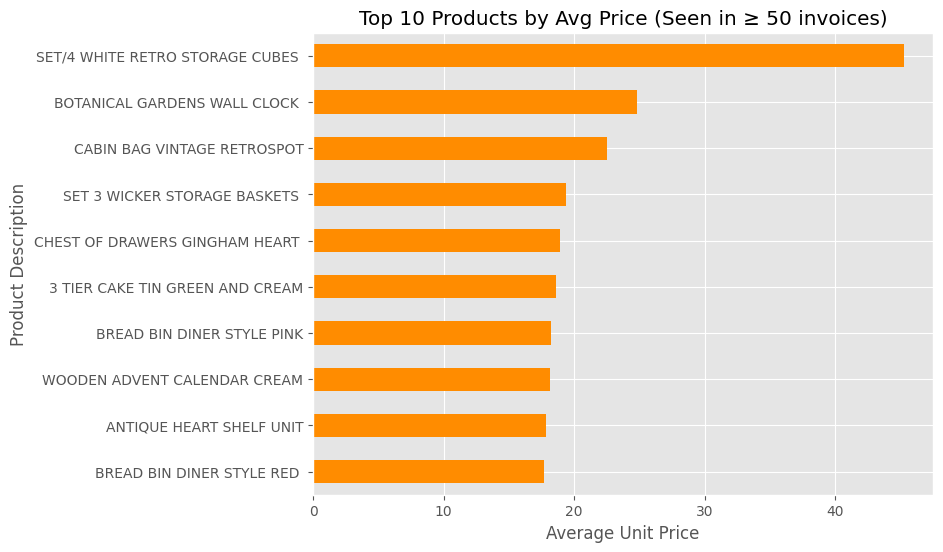

In [32]:
invoice_counts = df_clean_grouped.groupby(['Stock_Code', 'Description']).agg({
    'Unit_Price': 'mean',
    'Invoice_No': pd.Series.nunique
}).reset_index().rename(columns={'Invoice_No': 'Invoice_Count'})

filtered_by_invoice = invoice_counts[invoice_counts['Invoice_Count'] >= 50]

top_avg_price_invoice = filtered_by_invoice.sort_values('Unit_Price', ascending=False).head(10)

top_avg_price_invoice.sort_values('Unit_Price').plot(
    kind='barh', x='Description', y='Unit_Price',
    figsize=(8, 6), color='darkorange', legend=False,
    xlabel='Average Unit Price', ylabel='Product Description',
    title='Top 10 Products by Avg Price (Seen in ≥ 50 invoices)'
);

---

### 📊 **Russian**

#### 1. Топ товаров по средней цене (с проданными ≥50 единицами)

* Самый дорогой товар, проданный более 50 раз — **корзина для пикника на 60 предметов** за **649.50 фунтов**, 61 продажа.
* В топе также много **мебели и интерьерных вещей**, что говорит о периодических крупных покупках.
* Некоторые **декоративные товары** с хорошими объёмами (например, **настенные часы с ботаническим узором**) продавались по средней цене **£25–£45**.

#### 2. Топ товаров по средней цене (с ≥50 разными заказами)

* Лидер по числу заказов среди дорогих товаров — **набор из 4-х белых ретро-контейнеров**, продан в **155 накладных**, средняя цена **£45.23**.
* В списке много **предметов для кухни и хранения**, что говорит об их стабильной популярности.
* **Хлебницы**, **банки для тортов**, **новогодние календари** — хотя и не самые дорогие, заказывались часто, возможно, как подарки или полезные мелочи.

---

### 📊 **English**

#### 1. Top Products by Average Price with ≥50 Units Sold

* The highest-priced product sold over 50 times is the **PICNIC BASKET WICKER 60 PIECES** with an average price of **£649.50**, sold 61 times.
* Several **furniture items** (like cabinets and garden shelves) also appear, suggesting occasional high-ticket purchases.
* A few **home decor products** with strong sales volume (e.g. **BOTANICAL GARDENS WALL CLOCK**) had lower but still solid average prices around **£25–£45**.

#### 2. Top Products by Average Price with ≥50 Invoices

* The most commonly *repeatedly ordered* high-priced item is **SET/4 WHITE RETRO STORAGE CUBES**, ordered across **155 invoices**, with an average price of **£45.23**.
* Multiple **kitchen and storage items** appear in this list, suggesting they’re popular with many customers despite mid-range pricing.
* **Bread bins**, **cake tins**, and **calendar units** — while not expensive — were sold in large invoice volumes, possibly indicating gifts or essentials.

---


# <span style="color:transparent;">4. Product Metrics Breakdown</span>

<div style="
    background: #e6f2ec;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Merriweather', serif; font-size: 43px; font-weight: 600; margin: 0;">
        Product Metrics Breakdown
    </div>
</div>


## <span style="color:transparent;">4.1 AOV Analysis: Anonymous Customer</span>

<div style="
    background: #e6f2ec;
    padding: 45px 20px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Courier New', monospace; font-size: 42px; font-weight: normal; margin: 0;">
        AOV Analysis: Anonymous Customers
    </div>
</div>



In [33]:
df_clean[(df_clean['Customer_ID'].isna()) & (df_clean['Total'] > 0)].groupby('Invoice_No')['Total'].sum().mean().round(1)

1101.9

In [34]:
df_clean[(df_clean['Customer_ID'].notna()) & (df_clean['Total'] > 0)].groupby('Invoice_No')['Total'].sum().mean().round(1)

474.8

---

💡 **AOV-анализ: Анонимы тратят в 2.3 раза больше**

📊 **Распределение заказов и выручки:**

| Сегмент            | Кол-во заказов | AOV (£) |                     GMV (£) |
| ------------------ | -------------- | ------: | --------------------------: |
| Анонимные (без ID) | 1 371          |   1 102 | ≈ <strong>1.51 млн</strong> |
| Авторизованные     | 18 402         |     475 | ≈ <strong>8.74 млн</strong> |

👉 **Анонимы — всего 7% заказов, но 17% всей выручки.** Их средний чек в **2.3 раза выше**.

🧠 **Что это может означать:**

* Это крупные разовые заказы (возможно, B2B или маркетплейсы)
* Гостевой чек-аут, где не просят регу
* Теряем шанс вернуть клиента — ID нет, трекинг сломан

📌 **Гипотеза:** Если предложить скидку 5% за регистрацию перед покупкой — можно собрать больше ID, отслеживать возвраты и повышать LTV, не теряя GMV.

💡 **Как протестировать:**

* Группе А: оставить всё как есть
* Группе B: добавить баннер “Зарегистрируйся и получи скидку 5%”
* Измерить: % заказов с ID, GMV, AOV и, если получится, retention



---
💡 **AOV Analysis: Anonymous Customers Spend 2.3× More**

📊 **Order and Revenue Breakdown:**

| Segment           | Orders Count | AOV (£) |   GMV (£) |
| ----------------- | ------------ | ------: | -------------: |
| Anonymous (no ID) | 1,371        |   1,102 |  ≈ **1.51M**   |
| Identified        | 18,402       |     475 |  ≈ **8.74M**   |

👉 **Anonymous = just 7% of orders, but 17% of revenue.** Their AOV is **2.3× higher**.

🧠 **What this likely means:**

* These are large, one-off purchases (maybe B2B or marketplaces)
* Guest checkout without registration
* We're missing IDs = no tracking, no CRM, no return path

📌 **Hypothesis:** Offer a 5% discount for registering before checkout — we might collect more IDs, track more orders, and boost LTV without hurting GMV.

💡 **How to test it:**

* Group A: default checkout
* Group B: CTA “Register and get 5% off”
* Measure: % with ID, GMV, AOV, and retention (if possible)


---


## <span style="color:transparent;">4.2 Key Product Metrics</span>

<div style="
    background: #e6f2ec;
    padding: 45px 20px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Courier New', monospace; font-size: 42px; font-weight: normal; margin: 0;">
        Key Product Metrics
    </div>
</div>


In [35]:
GMV = df['Total'].sum().round(1)
AOV = df.groupby('Invoice_No')['Total'].sum().mean().round(1)
LTV = np.round(df_known.groupby('Customer_ID')['Total_Winsor'].sum().mean(), 0).astype('int64')

print(f"GMV for year (Total Revenue): £{GMV:,.2f}")
print(f"AOV for year (Average Order Value): £{AOV:,.2f}")
print(f"LTV for year (Customer Lifetime Value): £{LTV}")

GMV for year (Total Revenue): £9,764,070.50
AOV for year (Average Order Value): £393.40
LTV for year (Customer Lifetime Value): £1728


In [36]:
df_known['Month'] = df_known['Invoice_Date'].dt.to_period('M').dt.to_timestamp()

monthly_metrics = df_known.groupby('Month').agg({
    'Total_Winsor': 'sum',  # GMV
    'Invoice_No': pd.Series.nunique,  # Кол-во заказов
    'Customer_ID': pd.Series.nunique,  # Уникальные покупатели
    'Quantity_Winsor': 'sum'
}).rename(columns={
    'Total_Winsor': 'Revenue',
    'Invoice_No': 'Num_Orders',
    'Customer_ID': 'Num_Customers',
    'Quantity_Winsor': 'Total_Items'
}).reset_index()

In [37]:
monthly_metrics_raw = df.groupby('Month').agg({
    'Quantity':'sum',
    'Total':'sum',
    'Invoice_No':pd.Series.nunique}).rename(columns={'Total': 'GMV'}).reset_index()

monthly_metrics_raw['Items per Order'] = round(monthly_metrics_raw['Quantity'] /  monthly_metrics_raw['Invoice_No'], 0).astype('int64')

In [38]:
df_metrics = monthly_metrics.merge(monthly_metrics_raw, on='Month', sort='Month')
df_metrics.drop(columns=['Invoice_No', 'Quantity'], inplace=True)

In [39]:
df_metrics['Total_Orders'] = monthly_metrics_raw['Invoice_No']

df_metrics['AOV'] = np.round(df_metrics['GMV'] / df_metrics['Total_Orders'], 2)

df_metrics['AOV_known'] = np.round(df_metrics['GMV'] / df_metrics['Num_Orders'], 2)
df_metrics['ARPU'] = np.round(df_metrics['Revenue'] / df_metrics['Num_Customers'], 2)

---

**📌 Russian:**

Сначала рассчитали GMV и Items per Order на сырых данных (включая анонимных пользователей) — чтобы не искажать общую картину и сохранить полный объём заказов. Эти метрики не требуют `Customer_ID`, поэтому анонимы тут не мешают, а наоборот — добавляют полноты.

Затем на очищенных данных с известными `Customer_ID` посчитали бизнес-метрики: выручку, количество заказов, число уникальных клиентов, количество купленных товаров.

Оба датафрейма были объединены по месяцу — это позволило сравнивать полную картину (все заказы) с поведением идентифицированных клиентов и строить метрики вроде AOV, ARPU и другие.

---

**📌 English:**

First, we calculated GMV and Items per Order on raw data (including anonymous users) — to capture the full picture without losing valuable order volume. These metrics don't rely on `Customer_ID`, so anonymous users don't distort the results.

Then, we used cleaned data with known `Customer_ID`s to compute business metrics: revenue, number of orders, unique customers, and total items purchased.

Both dataframes were merged by month. This allowed us to compare the full market view (all orders) with the behavior of identified users, and compute key KPIs like AOV, ARPU, and more.

---

In [40]:
df_metrics

,Month,Revenue,Num_Orders,Num_Customers,Total_Items,GMV,Items per Order,Total_Orders,AOV,AOV_known,ARPU
0,2010-12-01,494933.46,1394,884,259043,758167.090,172,1984,382.14,543.88,559.88
1,2011-01-01,418080.87,983,739,233332,578914.410,217,1444,400.91,588.93,565.74
2,2011-02-01,398369.23,992,757,217385,499531.020,208,1352,369.48,503.56,526.25
3,2011-03-01,521692.83,1312,973,291092,679337.540,196,1892,359.06,517.79,536.17
4,2011-04-01,401022.19,1139,853,237891,482153.601,172,1691,285.13,423.31,470.13
5,2011-05-01,598405.11,1544,1054,317086,731088.100,186,2084,350.81,473.50,567.75
6,2011-06-01,537041.17,1390,990,306812,723970.150,193,1921,376.87,520.84,542.47
7,2011-07-01,527545.93,1321,946,313679,676845.411,212,1852,365.47,512.37,557.66
8,2011-08-01,550226.32,1267,933,328055,701379.990,245,1667,420.74,553.58,589.74
9,2011-09-01,812619.13,1739,1259,464879,1010227.311,248,2239,451.20,580.92,645.45


---

**Поскольку в выборке представлены только клиенты, совершившие хотя бы одну покупку, показатели ARPU и ARPPU совпадают.**

**Since the sample includes only customers who have made at least one purchase, the ARPU and ARPPU metrics are identical.**

---

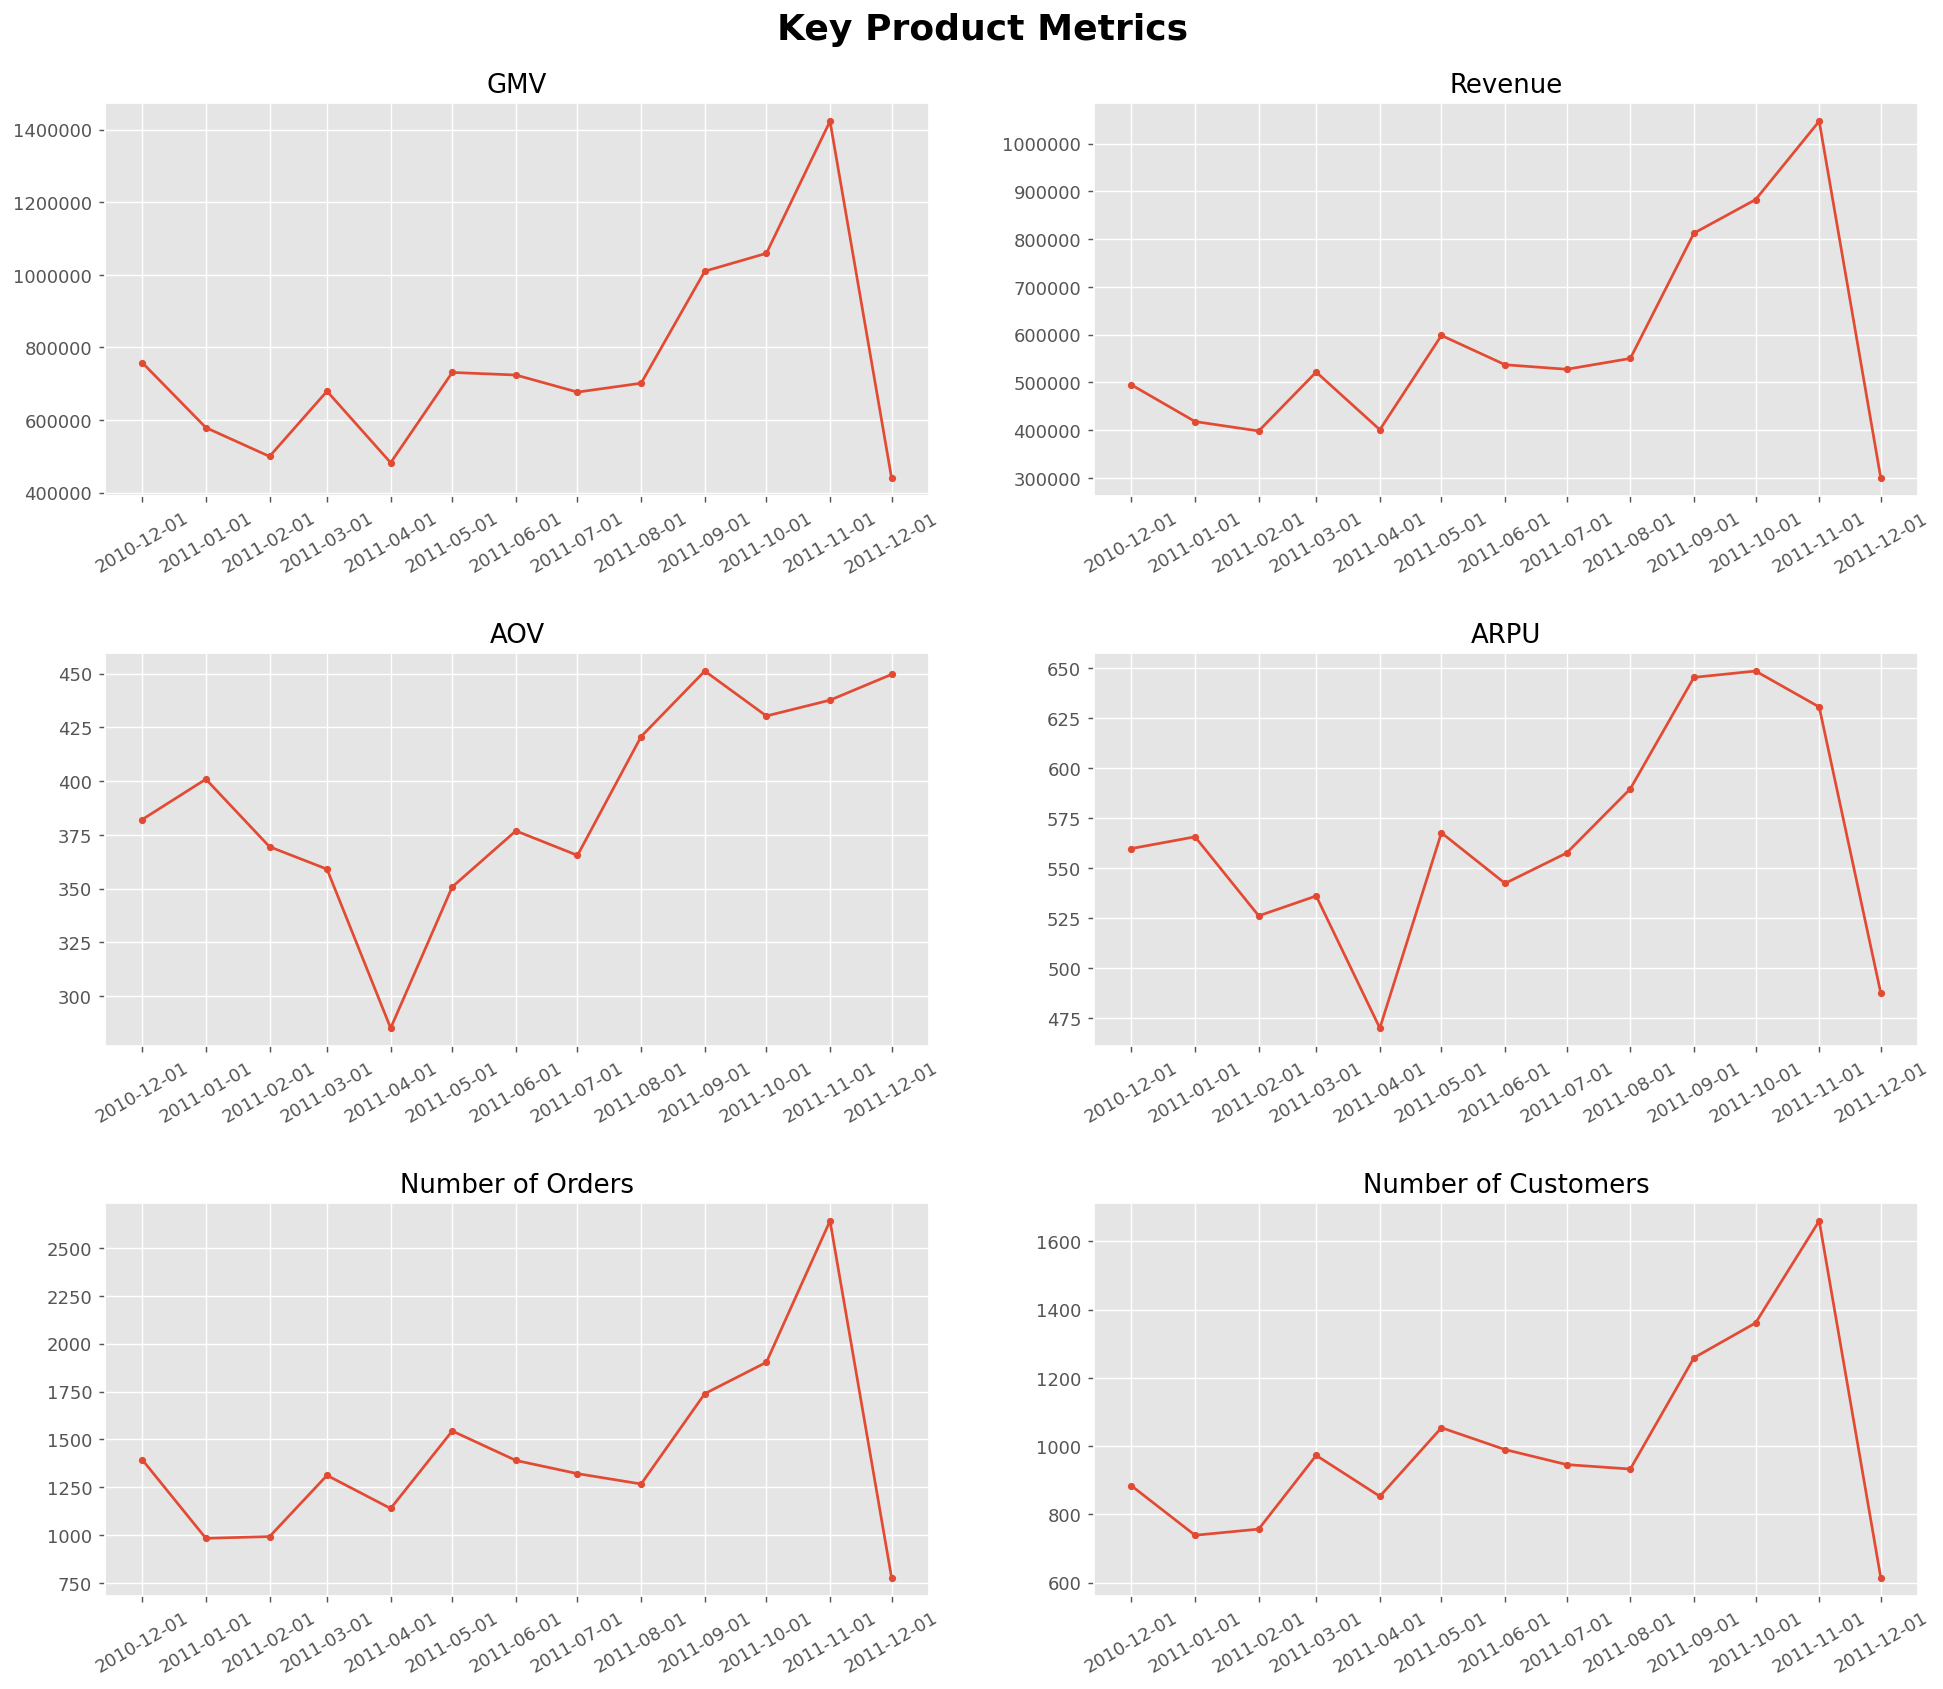

In [41]:
fig, ax = plt.subplots(figsize=(18,14), dpi=130, ncols=2, nrows=3)
ax[0][0].plot(df_metrics['Month'], df_metrics['GMV'], marker='.')
ax[0][0].ticklabel_format(axis='y', style='plain')
ax[0][0].set_title('GMV')

ax[0][1].plot(df_metrics['Month'], df_metrics['Revenue'], marker='.')
ax[0][1].ticklabel_format(axis='y', style='plain')
ax[0][1].set_title('Revenue')

ax[1][0].plot(df_metrics['Month'], df_metrics['AOV'], marker='.')
ax[1][0].set_title('AOV')

ax[1][1].plot(df_metrics['Month'], df_metrics['ARPU'], marker='.')
ax[1][1].set_title('ARPU')

ax[2][0].plot(df_metrics['Month'], df_metrics['Num_Orders'], marker='.')
ax[2][0].set_title('Number of Orders')

ax[2][1].plot(df_metrics['Month'], df_metrics['Num_Customers'], marker='.')
ax[2][1].set_title('Number of Customers')

fig.suptitle("Key Product Metrics",fontsize=20, fontweight='bold')
fig.subplots_adjust(top=0.93, hspace = 0.4)

months = df_metrics['Month']
for i in range(3):
    for j in range(2):
        ax[i][j].set_xticks(months)
        ax[i][j].tick_params(axis='x', rotation=30)

---

### 📊 **Выводы (на русском):**

1. **GMV и Revenue**:

   * С октября по ноябрь 2011 резкий рост, за которым следует резкое падение в декабре.
   * Вероятно, это сезонный пик (например, Black Friday / Cyber Monday), за которым идёт затишье.

2. **AOV (Average Order Value)**:

   * Значительные колебания, особенно весной 2011.
   * Но общий тренд — постепенный рост с середины года.

3. **ARPU (Average Revenue Per User)**:

   * Рост с июля по ноябрь, почти в два этапа.
   * В декабре — падение, как и в GMV/Revenue.

4. **Число заказов (Num of Orders)**:

   * Сильный всплеск в ноябре (максимум), затем резкий спад в декабре.
   * До этого — довольно плавный рост.

5. **Число клиентов (Num of Customers)**:

   * Похожий паттерн: пик в ноябре, спад в декабре.
   * До этого – стабильное или умеренное увеличение.

🧠 **Итог**: Все метрики резко пикнули в ноябре, а затем упали в декабре. Вероятно, это сезонная кампания/акция. В остальное время год — умеренный рост и цикличные колебания.

---

### 📊 **Summary (in English):**

1. **GMV and Revenue**:

   * Sharp rise from October to November 2011, followed by a significant drop in December.
   * Likely a seasonal peak (e.g., Black Friday or holiday campaign).

2. **AOV (Average Order Value)**:

   * Noticeable fluctuations, especially in early 2011.
   * Gradual upward trend from mid-year onward.

3. **ARPU (Average Revenue Per User)**:

   * Growth from July to November, in two clear steps.
   * December shows a decline, mirroring GMV and Revenue.

4. **Number of Orders**:

   * Strong peak in November, then a steep decline.
   * Prior to that — smooth, moderate growth.

5. **Number of Customers**:

   * Same pattern: November peak, December drop.
   * Otherwise, relatively steady increase.

🧠 **Conclusion**: All key metrics peaked in November, suggesting a seasonal or campaign effect. December drop looks like post-sale fatigue. Rest of the year shows steady growth with some natural variation.

---


# <span style="color:transparent;">5. Cohort Analysis</span>

<div style="
    background: #e6f2ec;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Merriweather', serif; font-size: 43px; font-weight: 600; margin: 0;">
        Cohort Analysis
    </div>
</div>


In [42]:
from operator import attrgetter

# 1. Месяц покупки и когорта
df_known['Purchase_Month'] = df_known['Invoice_Date'].dt.to_period('M')
df_known['Cohort_Month'] = df_known.groupby('Customer_ID')['Invoice_Date'].transform('min').dt.to_period('M')

# 2. Разница в месяцах (число месяцев между покупкой и первой покупкой)
# df['Cohort_Index'] = (df['Purchase_Month'] - df['Cohort_Month']).apply(lambda x: x.n)
df_known['Cohort_Index'] = (df_known['Purchase_Month'] - df_known['Cohort_Month']).apply(attrgetter('n'))

In [43]:
cohort_data = df_known.groupby(['Cohort_Month', 'Cohort_Index']) \
                .agg(n_customers=('Customer_ID', 'nunique'),
                     revenue=('Total_Winsor', 'sum')) \
                .reset_index()

# cohort_data = (
#     df_known.groupby(['Cohort_Month', 'Cohort_Index'])
#       .agg({'Customer_ID': 'nunique', 'Total_Winsor': 'sum'})
#       .rename(columns={'Customer_ID': 'n_customers', 'Total_Winsor': 'revenue'})
#       .reset_index()
# )

## <span style="color:transparent;">5.1 Retention Over Time</span>

<div style="
    background: #e6f2ec;
    padding: 45px 20px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Courier New', monospace; font-size: 42px; font-weight: normal; margin: 0;">
        Retention Over Time
    </div>
</div>


In [44]:
retention = cohort_data.pivot_table(index='Cohort_Month', columns='Cohort_Index', values='n_customers')
retention_rate = 100 * retention.divide(retention[0], axis=0).round(3)

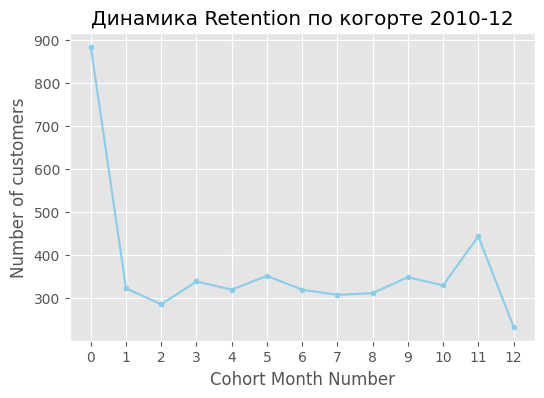

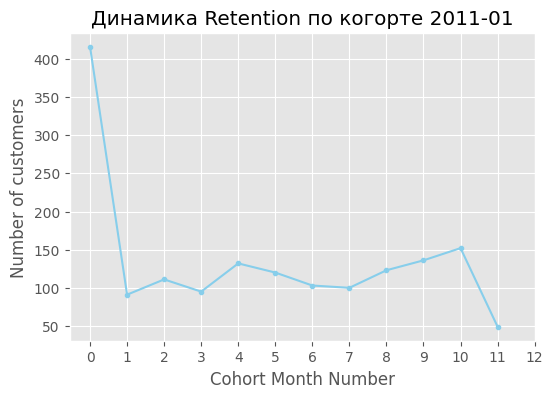

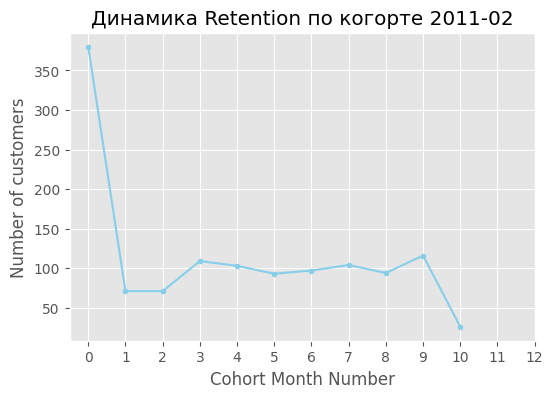

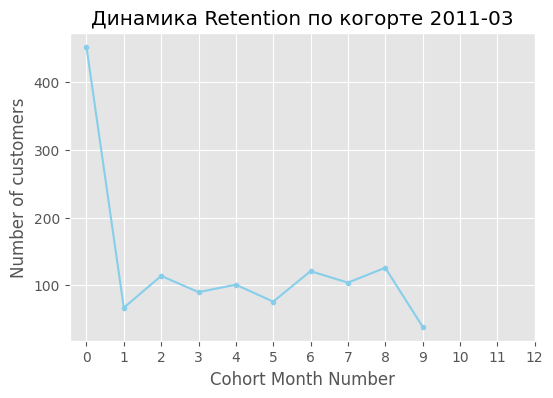

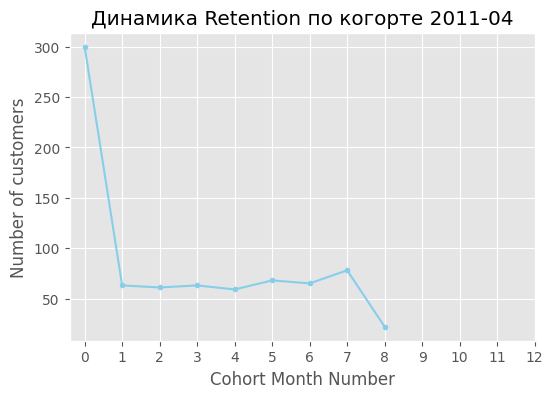

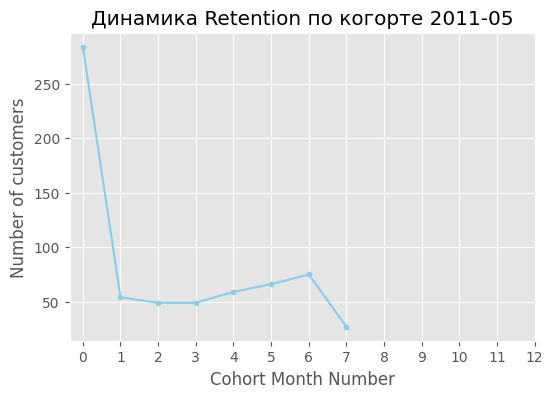

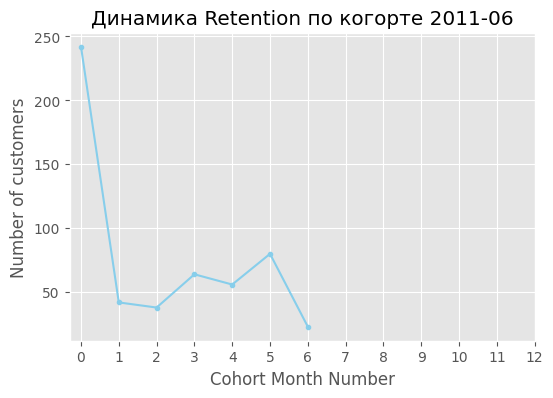

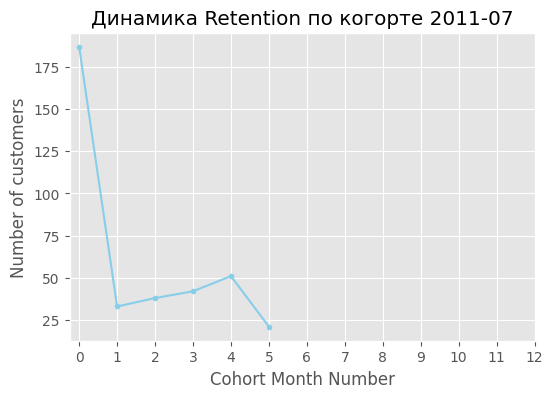

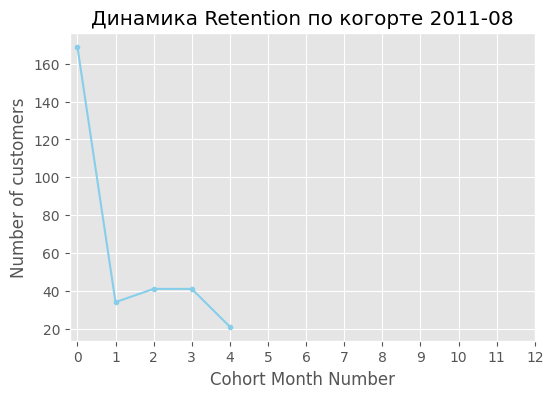

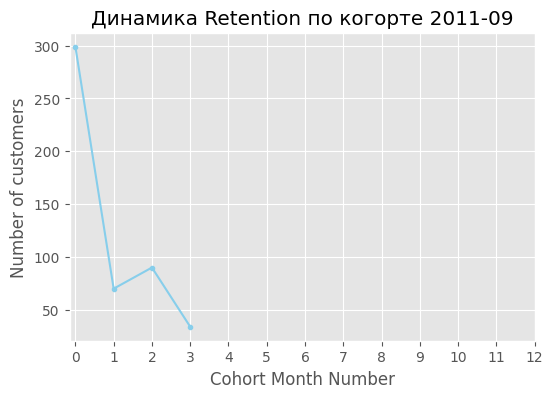

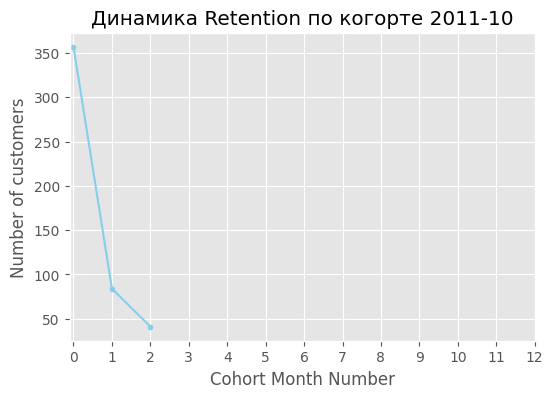

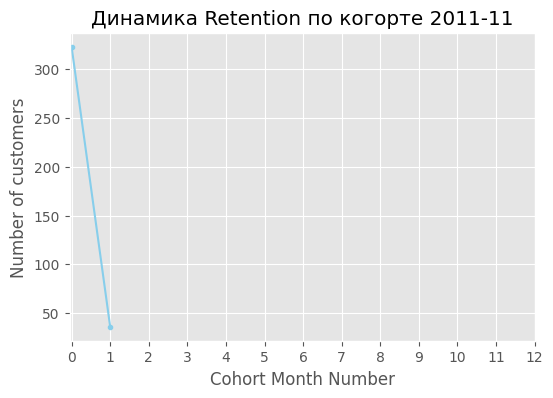

In [45]:
#поведение по каждой когорте из месяца в месяц
for i in range(0, retention.shape[0]-1):
    plt.figure(figsize=(6, 4))
    plt.plot(retention.iloc[i], marker='.', color='skyblue')
    plt.grid(True)
    plt.title('Динамика Retention по когорте ' + str(retention.iloc[i].name)[:11])
    plt.xlabel('Cohort Month Number')
    plt.ylabel('Number of customers')
    plt.xticks(retention.columns)
    plt.show()

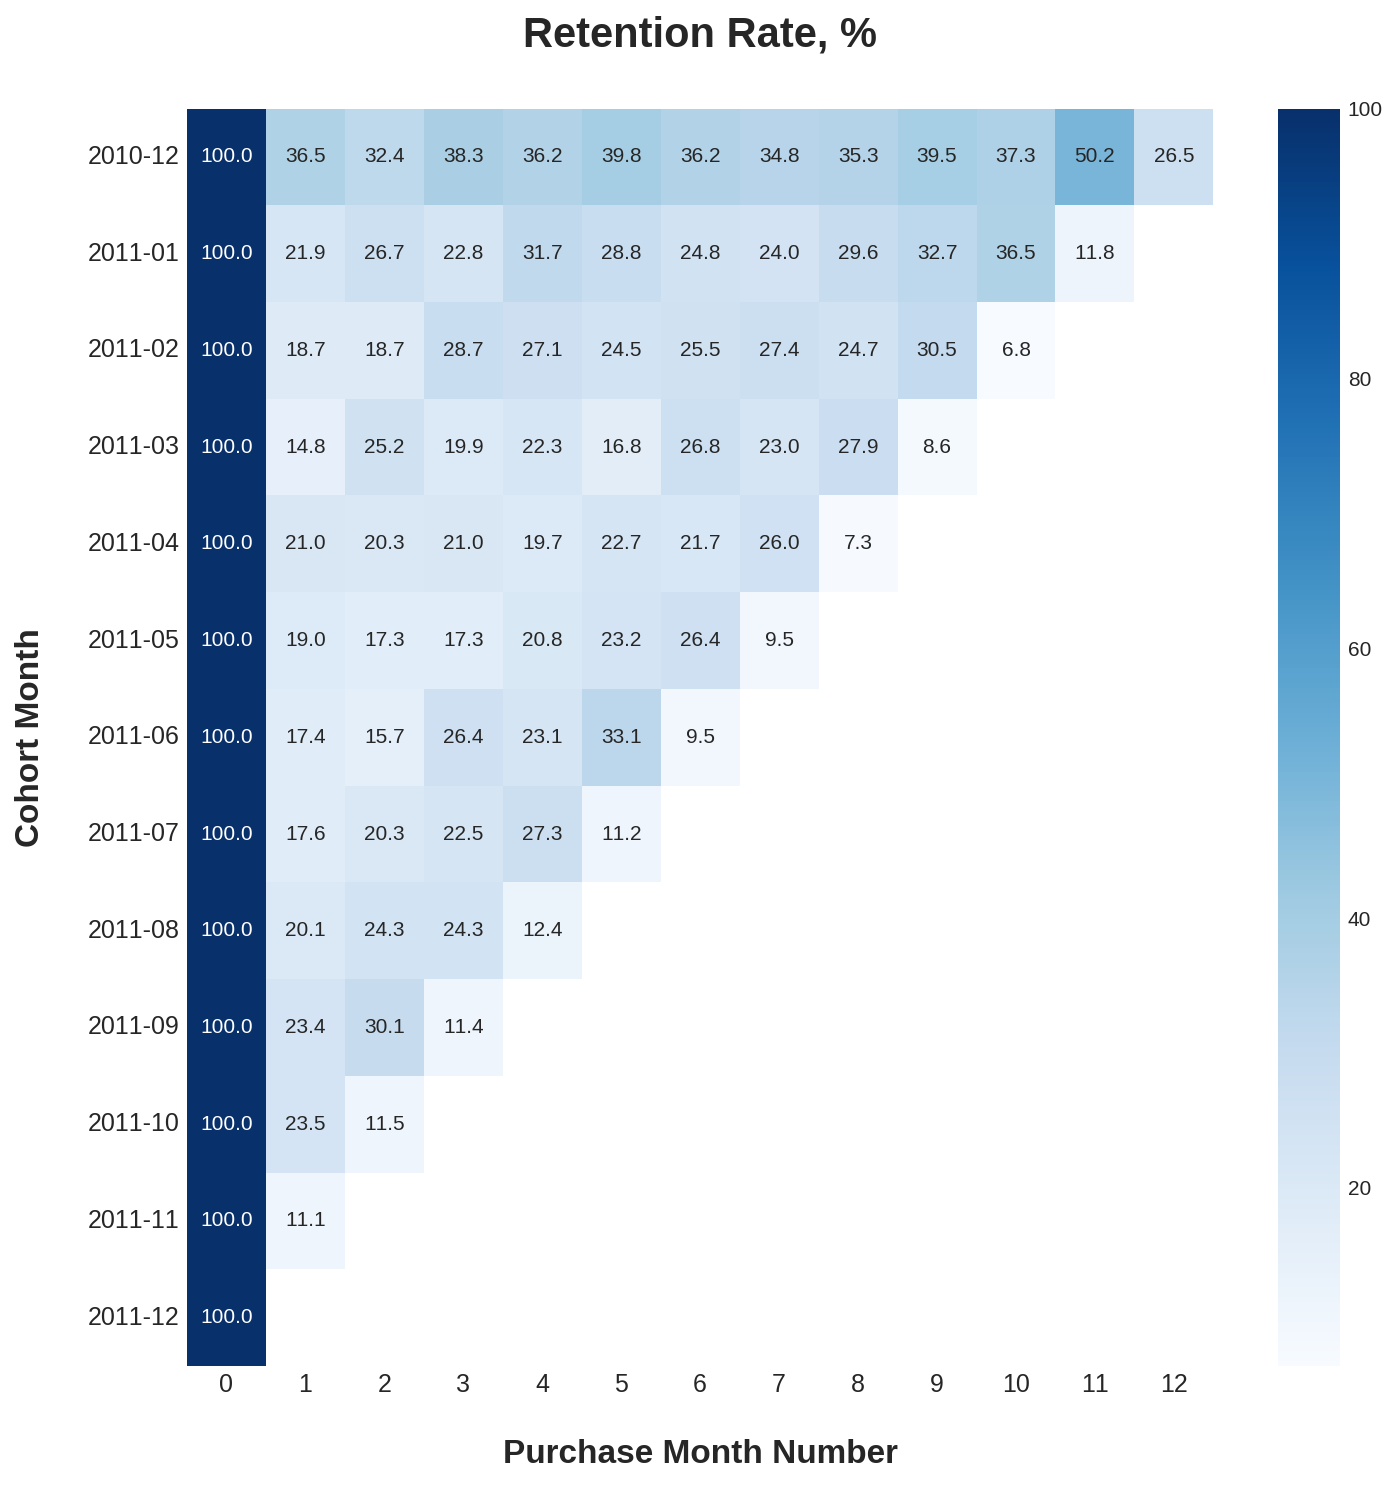

In [46]:
plt.style.use('seaborn-v0_8-white')
fig = plt.figure(figsize=(10, 10), dpi=150)

sns.heatmap(retention_rate, annot=True, fmt='.1f', cmap='Blues')

plt.title('Retention Rate, %', fontsize=20, fontweight='bold', pad=30)

plt.ylabel('Cohort Month', fontsize=16, fontweight='bold', labelpad=20)
plt.yticks(rotation=0, fontsize=12) 
plt.xticks(fontsize=12)

plt.xlabel('Purchase Month Number', fontsize=16, fontweight='bold', labelpad=20)

plt.tight_layout(); 

---

<div style="margin-top: 0; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
  Russian:
</div>

### 1. **Сильный старт в декабре 2010**

* Первая когорта (2010-12) показала наилучшие показатели удержания:

  * 2–3 месяцы: 32.4% – 38.3%
  * даже в 12-м месяце ещё **26.5% пользователей** активны (!).
* Это аномально сильная когорта. Либо маркетинг сработал, либо сезон (например, рождественские покупки), либо оба.

🧠 *Хак*: если первая когорта — лучшая, часто это **launch effect** или сезон.

---

### 2. **Резкое падение удержания у следующих когорт**

* Январь 2011: уже только 21.9% остаются на 1-й месяц (vs. 36.5% в декабре).
* В последующих месяцах удержание **не растёт и даже ухудшается**.
* Например:

  * 2011-03: удержание на 3-м месяце — **19.9%**
  * 2011-06: на 5-м месяце — **33.1%**, но дальше быстро обрывается.

🧠 *Вывод*: продукт **не удерживает** большинство пользователей в долгую. Есть **проблемы с вовлечением** после первого-второго месяца.

---

### 3. **Сезонные скачки**

* Июнь 2011 (2011-06) и июль 2011 (2011-07) показывают **всплеск retention**:

  * 2011-06: 3-й месяц — 26.4%, 5-й — 33.1%
  * 2011-07: 4-й месяц — 27.3%
* Может быть **летняя акция**, **сезон распродаж**, или какая-то маркетинговая активность.

---

### 4. **Общее ухудшение retention с течением времени**

* Более поздние когорты, например:

  * 2011-10: уже на 2-м месяце только 11.5%
  * 2011-11: 2-й месяц — 11.1%
* Это **не только шум**, но и **системный тренд** — падение лояльности новых пользователей со временем.

🧠 *Значит*: продукт либо не эволюционирует, либо **качество трафика ухудшается** (менее релевантные пользователи приходят).

---


| Вопрос                           | Ответ                                                                                    |
| -------------------------------- | ---------------------------------------------------------------------------------------- |
| **Какая когорта лучшая?**        | 2010-12 — уникально сильная.                                                             |
| **Retention падает или растёт?** | В целом падает с течением месяцев.                                                       |
| **Есть всплески?**               | Да, в середине 2011 (возможно маркетинг).                                                |
| **Есть ли тревожные сигналы?**   | У новых когорт (осень 2011) retention совсем слабый — продукт или трафик явно проседает. |


<div style="margin-top: 0; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
  English:
</div>

---

### 🔎 Key Insights from the Retention Heatmap

1. **Strong December 2010 Cohort**

   * The Dec 2010 cohort retained users exceptionally well — over 35% in later months and **still 26.5% in month 12**.
   * Likely a **seasonal effect** (holiday shopping) or a result of **strong launch marketing**.

2. **Sharp Drop-Off in Later Cohorts**

   * Starting January 2011, retention drops hard: e.g., just 21.9% in month 1.
   * Later cohorts continue to show **weaker retention**, especially after month 2–3.

3. **Temporary Spikes Mid-2011**

   * Cohorts in June–July 2011 show slight recovery (e.g., 33.1% at month 5 for June).
   * Possibly due to **promotions**, **seasonal trends**, or **product changes**.

4. **Worsening Trend Over Time**

   * By Q4 2011, even month-1 retention drops to 11–12%.
   * Indicates **user quality degradation**, **product fatigue**, or **lack of engagement innovation**.

---

## <span style="color:transparent;">5.2 Revenue per Cohort</span>

<div style="
    background: #e6f2ec;
    padding: 45px 20px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Courier New', monospace; font-size: 42px; font-weight: normal; margin: 0;">
        Revenue per Cohort
    </div>
</div>


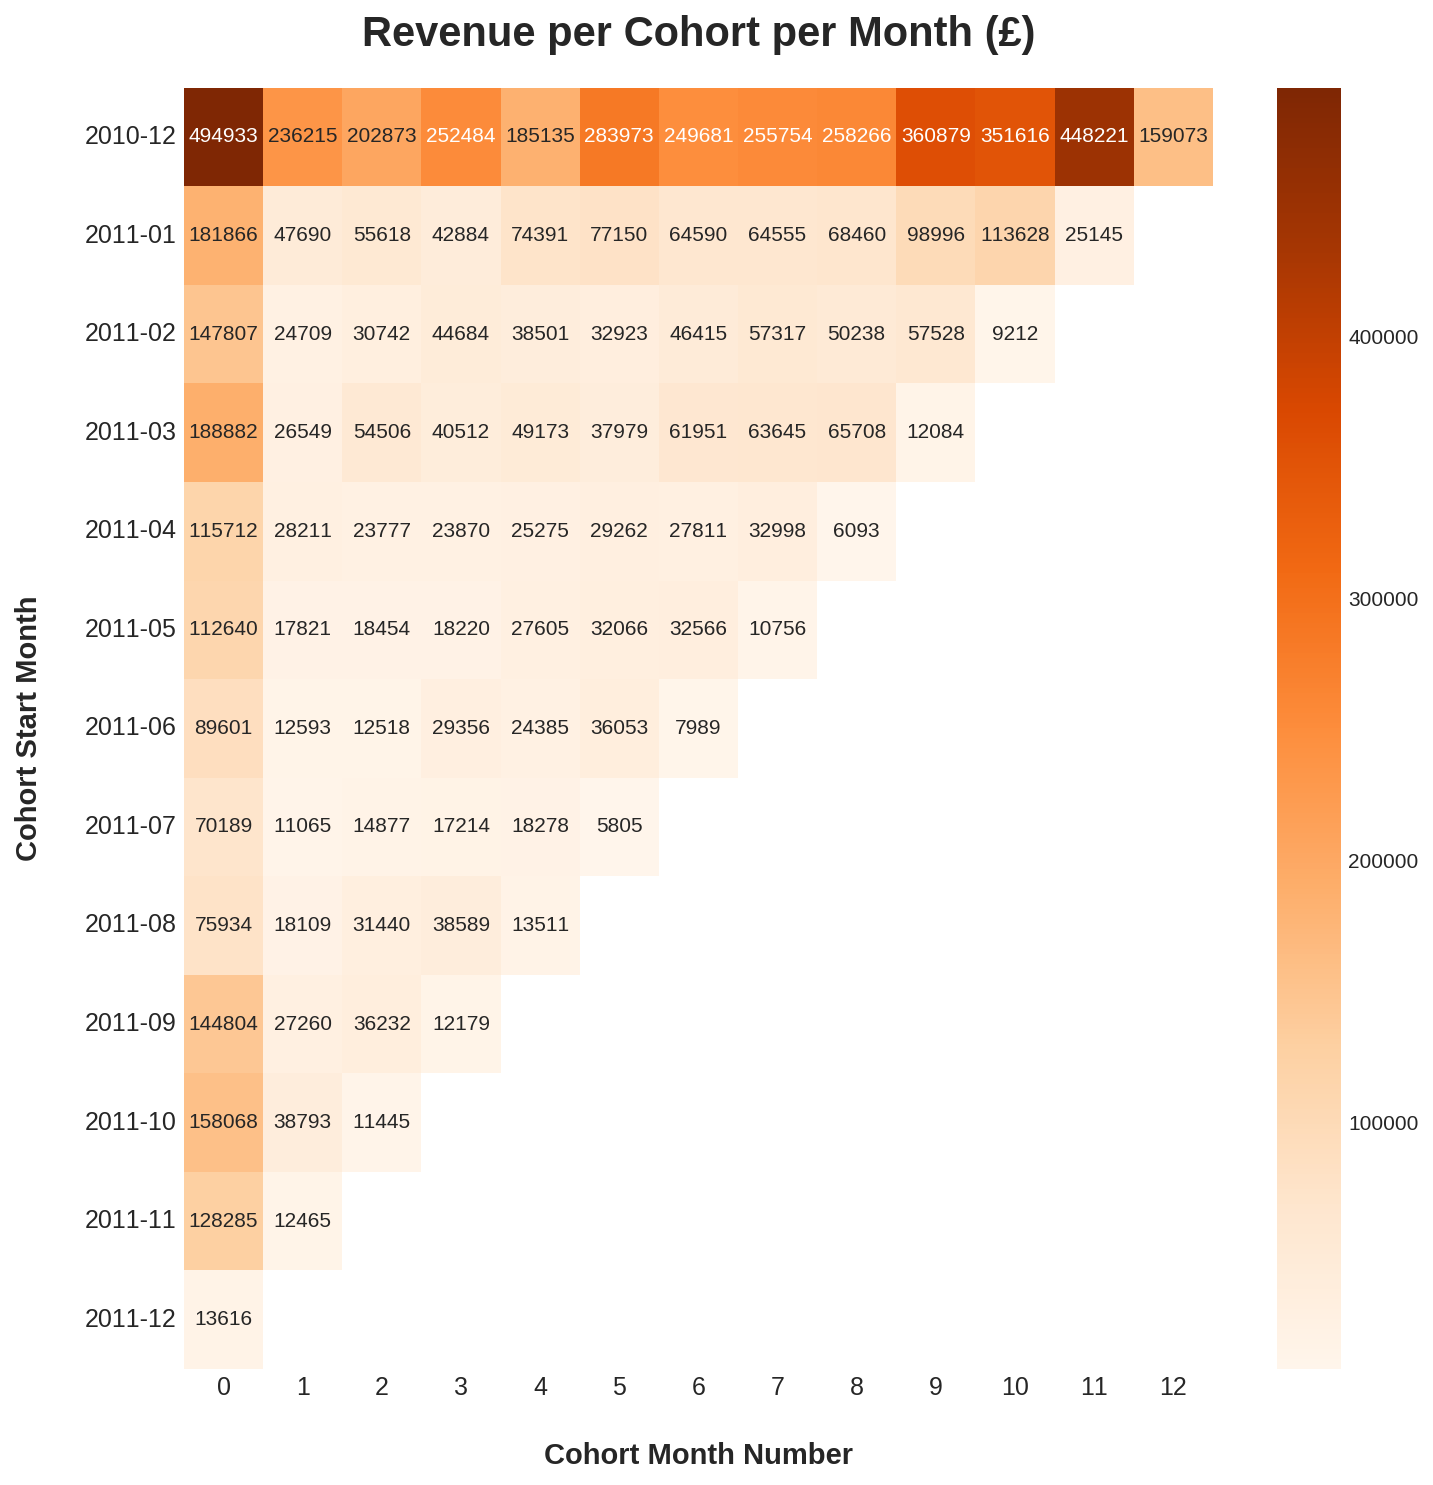

In [47]:
revenue_pivot = cohort_data.pivot_table(
    index='Cohort_Month',
    columns='Cohort_Index',
    values='revenue'
)


plt.figure(figsize=(10, 10), dpi=150)
sns.heatmap(revenue_pivot, cmap='Oranges', annot=True, fmt='.0f')
plt.title('Revenue per Cohort per Month (£)', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Cohort Month Number', fontsize=14, fontweight='bold', labelpad=20)
plt.ylabel('Cohort Start Month', fontsize=14, fontweight='bold', labelpad=20)

plt.yticks(rotation=0, fontsize=12) 
plt.xticks(fontsize=12)

plt.tight_layout();  

---

### 📊 **Выводы (Revenue Heatmap)**

#### Russian:

1. **Коорта 2010-12** — самый денежный сегмент: даёт высокий доход даже спустя 12 месяцев. Особенно заметны пики на 1, 3, 5, 9 и 11 месяцах.
2. **Остальные когорты** быстро теряют выручку: после первого месяца доход резко падает, особенно в 2011 году.
3. Есть несколько **анормально сильных пиков**:
   — 2011-01 в 10 месяце (\$98k+)
   — 2011-03 в 8–9 месяцах (\$65k+)
   
   Это может быть связано с акциями или возвратом ключевых клиентов.
5. В **поздних когортах** (сентябрь-декабрь 2011) выручка заметно ниже — возможно, связано с падением качества трафика или сезонностью.
6. Почти все когорты демонстрируют **типичное затухание LTV** — подтверждает важность фокуса на удержании в первые 1–3 месяца.

---

#### English:

1. **Cohort 2010-12** is the top revenue driver — it shows sustained high income even 12 months after acquisition. Noticeable spikes occur at months 1, 3, 5, 9, and 11.
2. **Other cohorts drop off quickly** — revenue sharply declines after the first month, especially throughout 2011.
3. There are a few **unusual revenue spikes**:
   — 2011-01 cohort at month 10 (\$98k+)
   — 2011-03 cohort at months 8–9 (\$65k+)
   
   These may indicate promotions, seasonal events, or the return of high-value customers.
5. **Late 2011 cohorts** (Sep–Dec) generate significantly less revenue — possibly due to weaker customer quality or seasonality.
6. Most cohorts show a **typical LTV decay pattern** — reinforcing that retention within the first 1–3 months is crucial.

---


## <span style="color:transparent;">5.3 LTV and Cumulative LTV</span>

<div style="
    background: #e6f2ec;
    padding: 45px 20px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Courier New', monospace; font-size: 42px; font-weight: normal; margin: 0;">
        LTV and Cumulative LTV
    </div>
</div>

In [48]:
cohort_sizes = cohort_data.groupby('Cohort_Month')['n_customers'].first()

monthly_revenue = cohort_data.pivot_table(
    index='Cohort_Month',
    columns='Cohort_Index',
    values='revenue'
)

cohort_sizes_df = cohort_sizes.to_frame().rename(columns={'n_customers': 'cohort_size'})


monthly_ltv = monthly_revenue.div(cohort_sizes_df['cohort_size'], axis=0)

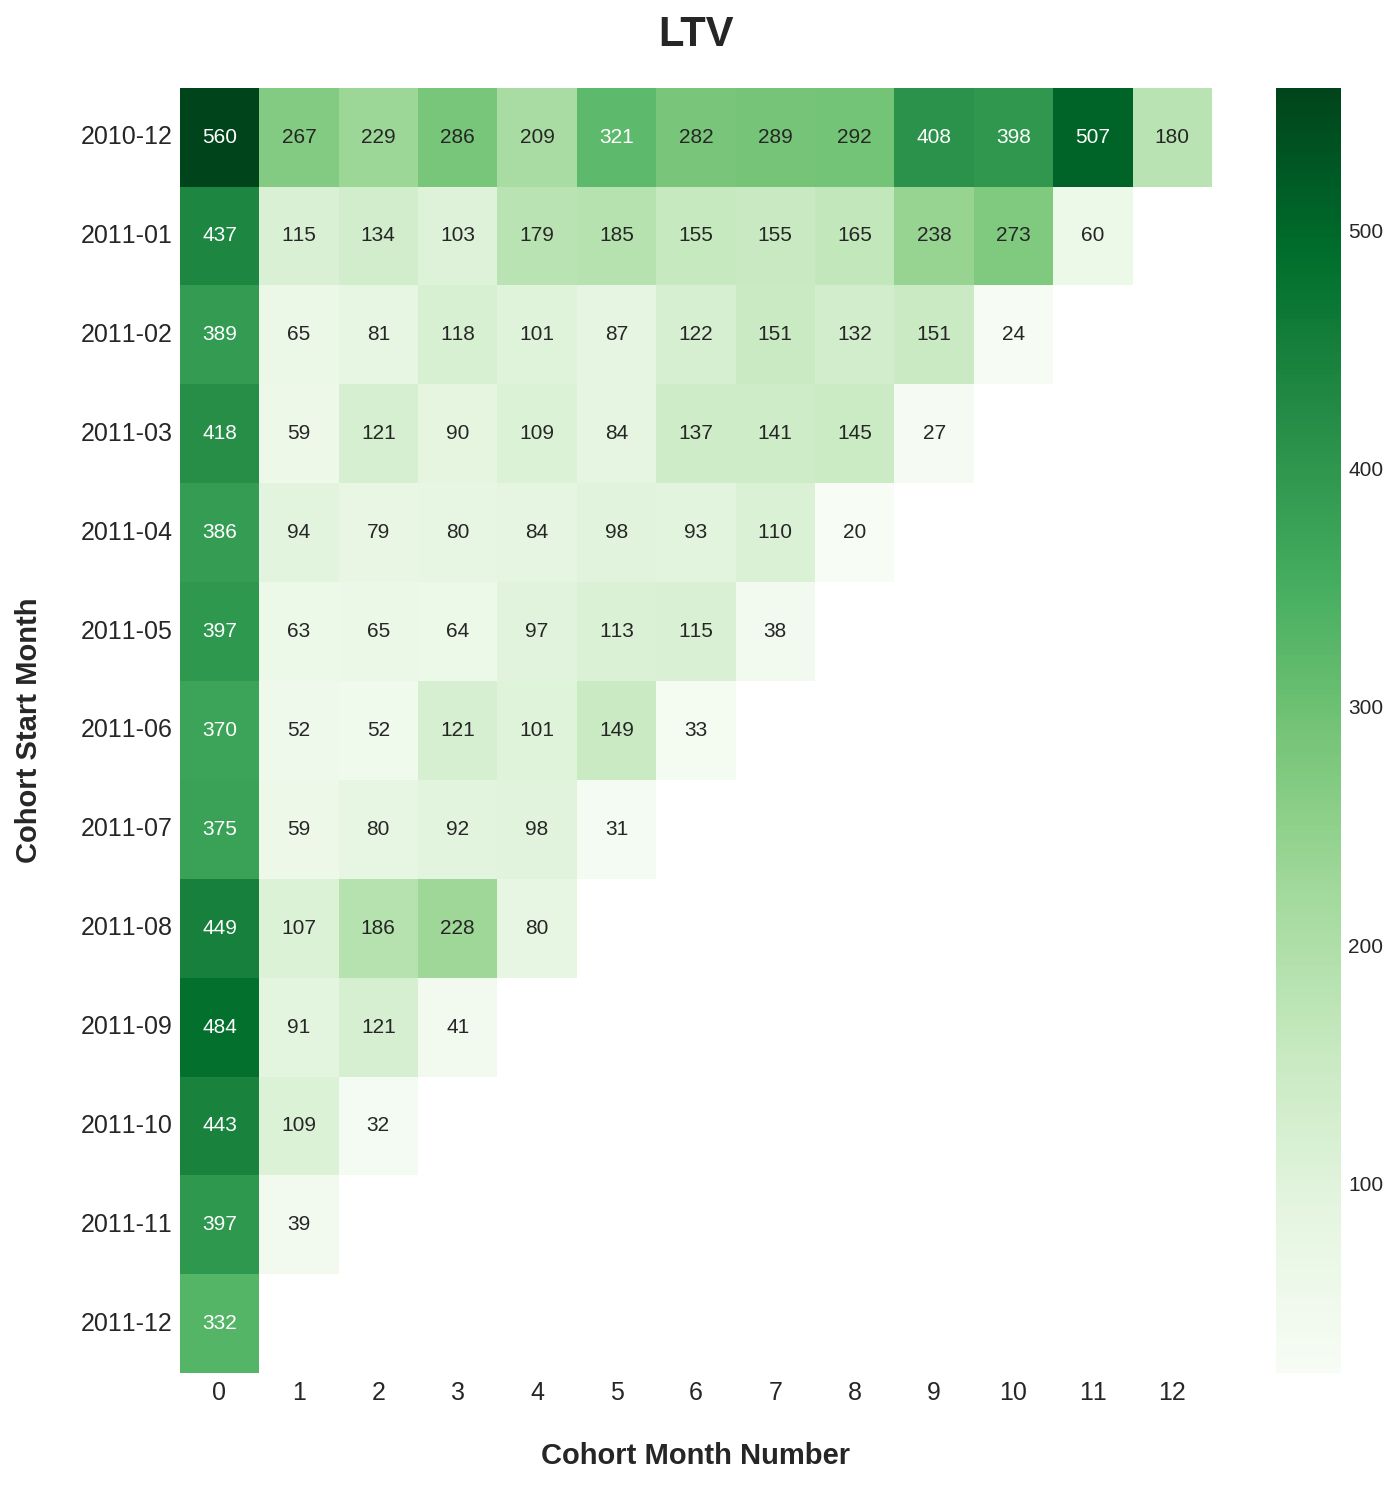

In [49]:
plt.figure(figsize=(10, 10), dpi=150)
sns.heatmap(monthly_ltv, cmap='Greens', annot=True, fmt='.0f')
plt.title('LTV', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Cohort Month Number', fontsize=14, fontweight='bold', labelpad=18)
plt.ylabel('Cohort Start Month', fontsize=14, fontweight='bold', labelpad=18)

plt.yticks(rotation=0, fontsize=12) 
plt.xticks(fontsize=12)

plt.tight_layout(); 

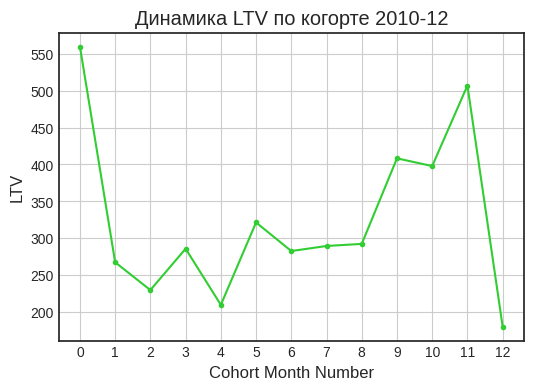

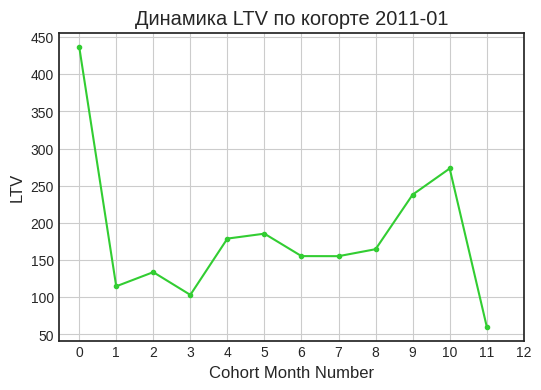

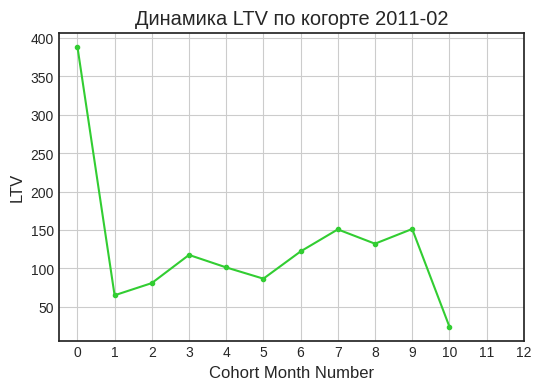

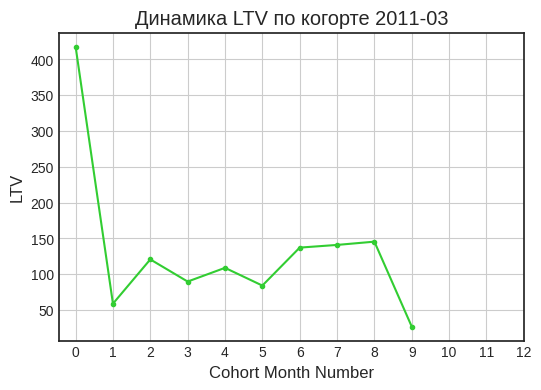

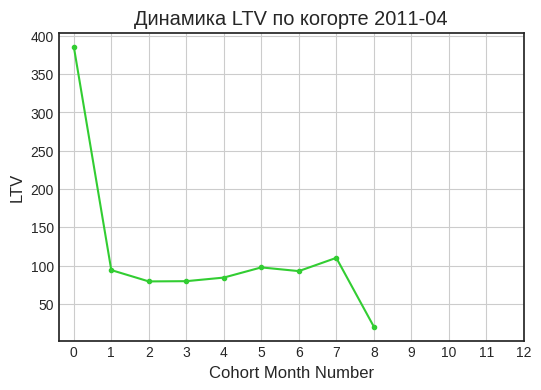

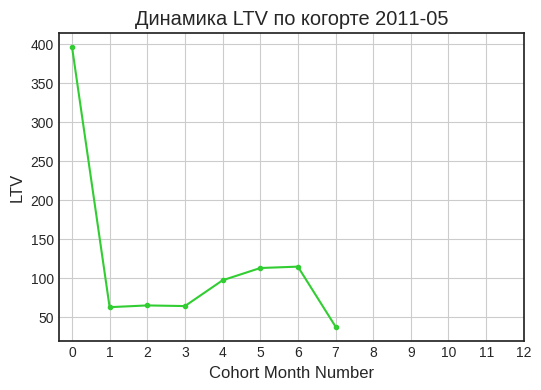

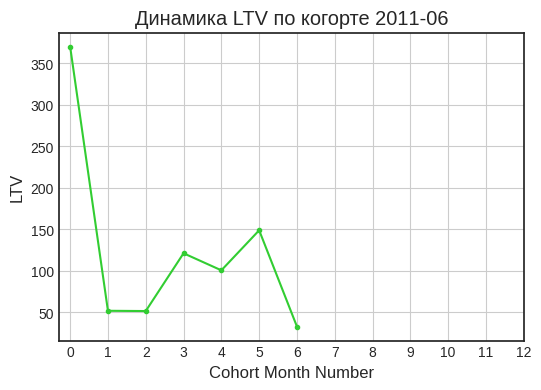

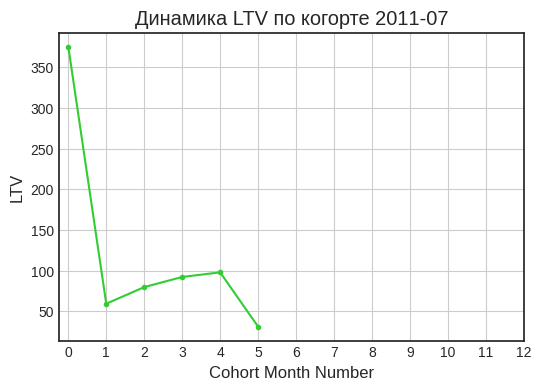

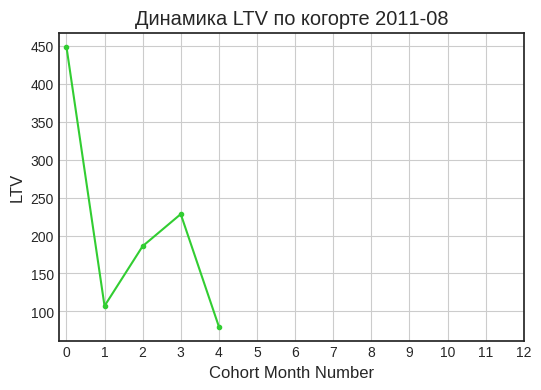

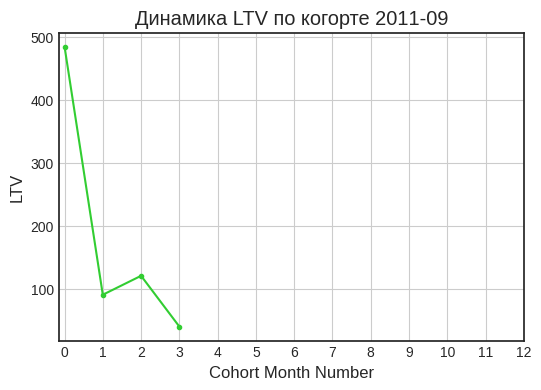

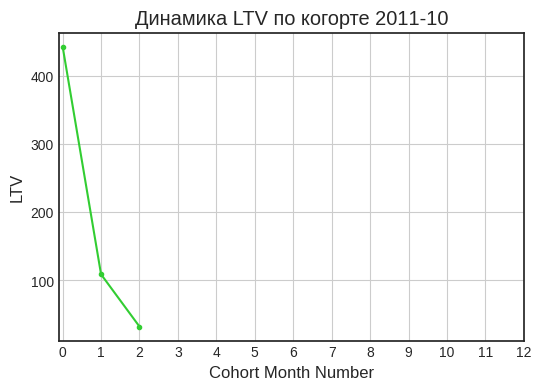

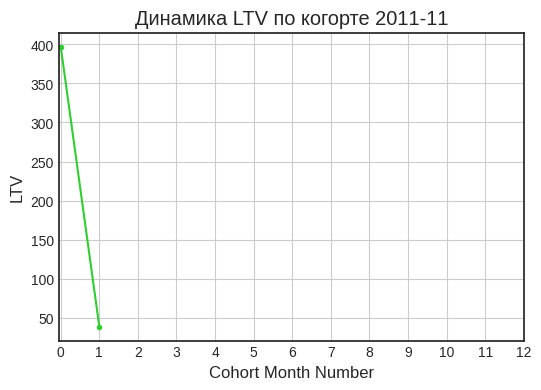

In [50]:
for i in range(0, monthly_ltv.shape[0]-1):
    plt.figure(figsize=(6, 4))
    plt.plot(monthly_ltv.iloc[i], marker='.', color='limegreen')
    plt.grid(True)
    plt.title('Динамика LTV по когорте ' + str(monthly_ltv.iloc[i].name)[:11])
    plt.xlabel('Cohort Month Number')
    plt.ylabel('LTV')
    plt.xticks(monthly_ltv.columns)
    plt.show()


---

### 📊 **Выводы по LTV:**

#### 🔹 1. **Пиковые значения LTV**

* Самая "дорогая" когорта — **декабрь 2010**, где клиенты уже в первый месяц (`Cohort_Index = 0`) дали в среднем **560 у.е.**, а к 12-му месяцу — **почти 180 у.е.**, при этом в некоторых месяцах наблюдаются всплески (например, 507 у.е. в `Index = 11`).
* Это может быть связано с пиковыми продажами перед Новым годом.

#### 🔹 2. **Типичная динамика LTV**

* Почти во всех когортах видно **резкое падение после первого месяца**. Например:

  * Январь 2011: 437 → 114 → 133 → 103 и т.д.
  * Февраль 2011: 389 → 65 → 81 → 118 → 101
* Это нормальное поведение: большинство клиентов совершают крупную покупку при первом взаимодействии, а затем либо отваливаются, либо приносят меньше.

#### 🔹 3. **Редкие всплески в LTV**

* Некоторые когорты показывают всплески через 3–6 месяцев:

  * Июнь 2011: от 52 → до 121 → до 149 на `Index = 5`
  * Август 2011: от 107 → 186 → 228 на `Index = 3`

📌 Это может говорить о повторных кампаниях, скидках, или сезонной активности.

#### 🔹 4. **LTV затухает**

* Почти во всех когортах после 4–6 месяцев значения LTV стремятся к нулю или остаются на очень низком уровне — типичная **“длинная шея”**.


---

### **LTV Insights:**

#### 🔹 1. **Highest LTV cohort**

* The cohort from **Dec 2010** shows the **highest LTV**: \~560 in month 0 and \~180 by month 12.
* Some spikes occur later (e.g., 507 in month 11), possibly due to holiday seasonality.

#### 🔹 2. **Typical drop-off pattern**

* Most cohorts show a **sharp decline after the first month**.

  * Example: Jan 2011 goes from 437 → 114 → 133 → 103…
  * This is expected: customers often spend the most on their first purchase.

#### 🔹 3. **Occasional spikes**

* Some cohorts (e.g., June 2011 and Aug 2011) show an **increase in LTV a few months in** — possibly promotions, product launches, or seasonality.

#### 🔹 4. **LTV decays quickly**

* In most cases, LTV becomes flat or near-zero after 4–6 months — a typical **long-tail pattern**.

---


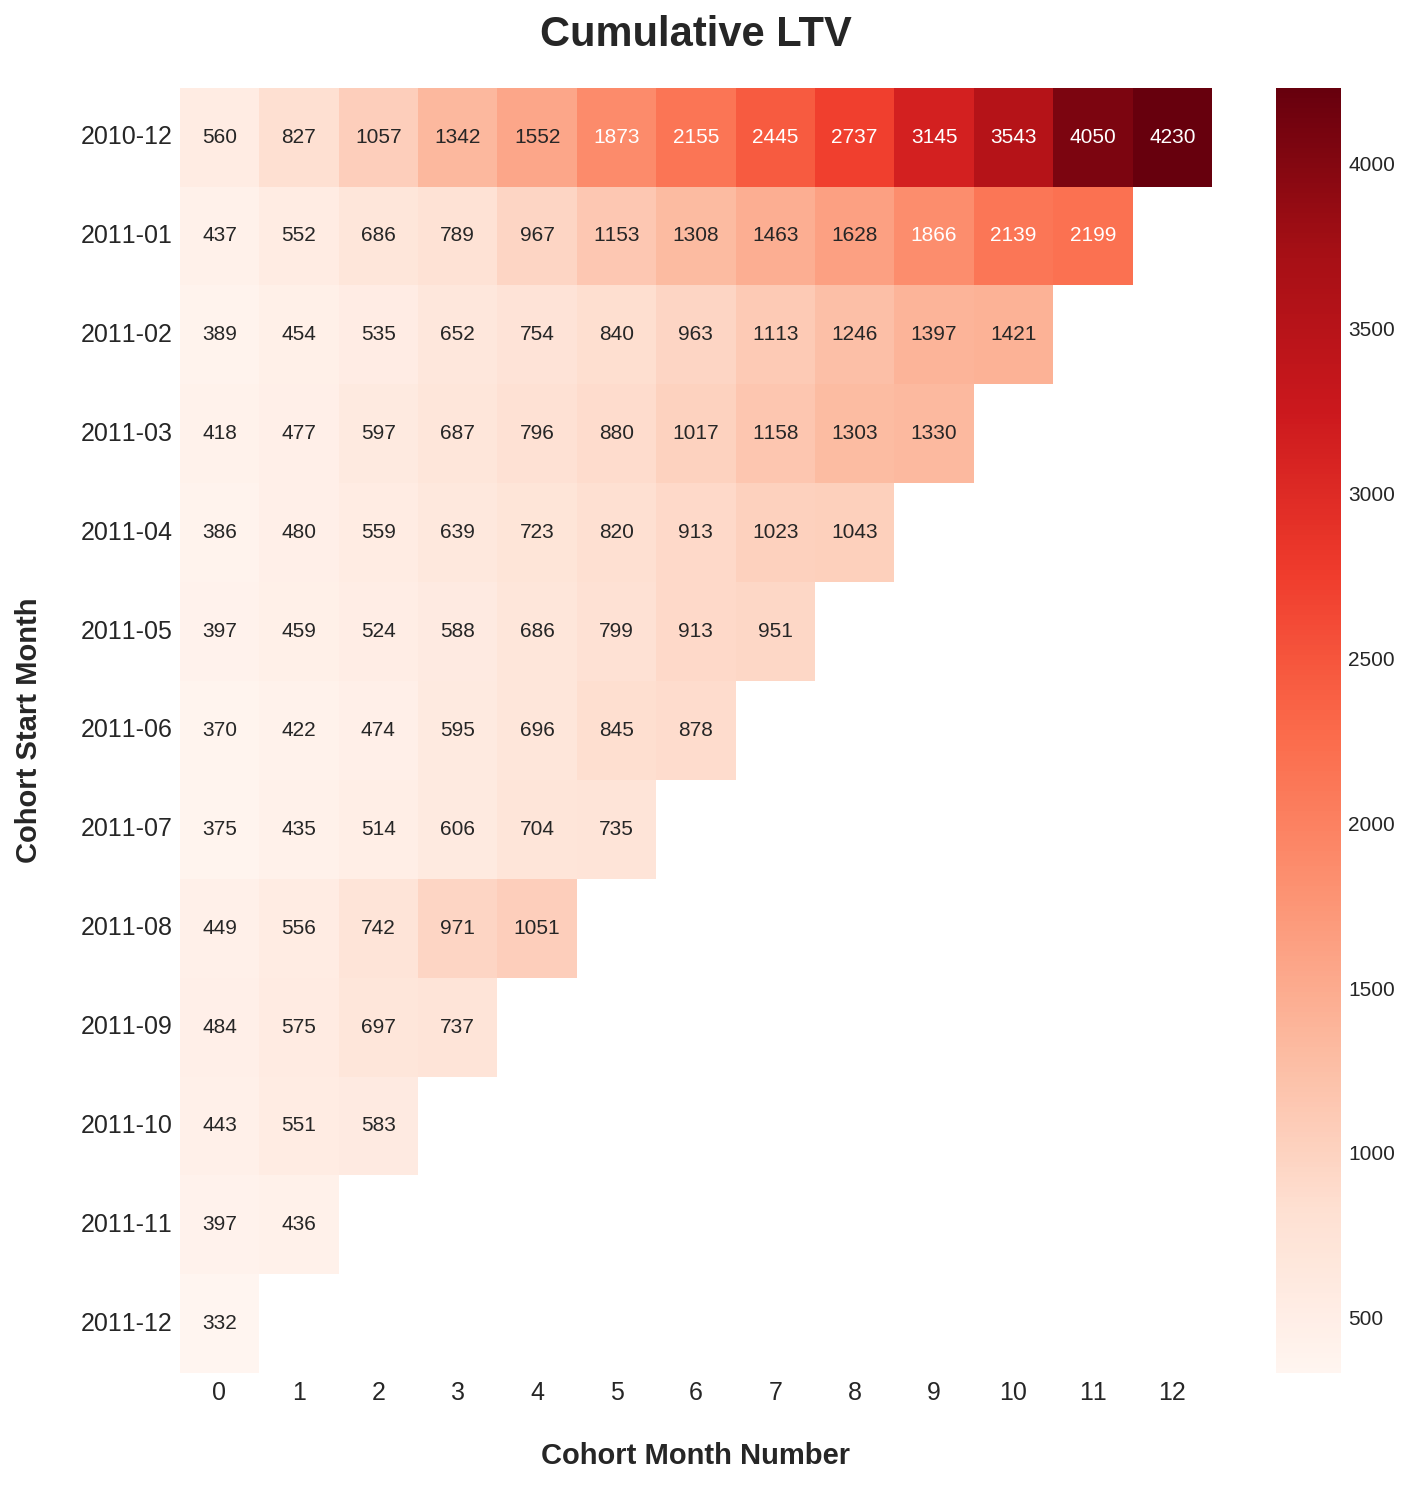

In [51]:
cumulative_ltv = monthly_ltv.cumsum(axis=1).round(2)

plt.figure(figsize=(10, 10), dpi=150)
sns.heatmap(cumulative_ltv, cmap='Reds', annot=True, fmt='.0f')
plt.title('Cumulative LTV', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Cohort Month Number', fontsize=14, fontweight='bold', labelpad=18)
plt.ylabel('Cohort Start Month', fontsize=14, fontweight='bold', labelpad=18)

plt.yticks(rotation=0, fontsize=12) 
plt.xticks(fontsize=12)

plt.tight_layout(); 

**Если бы у нас был CAC (затраты на привлечение клиента)**  
    Мы бы могли **найти точку окупаемости** — когда cumulative LTV > CAC.  
    Сейчас мы можем только **оценить ценность**, но **не окупаемость**.

---

### 📊 **Cumulative LTV — Выводы:**

#### 🔹 1. **Что мы здесь вообще видим?**

* Таблица показывает, **сколько в сумме дохода принёс один клиент каждой когорты по месяцам** с момента первой покупки.
* Например, клиенты из когорты **декабрь 2010** принесли:

  * 559.88 у.е. в первый месяц,
  * 827.09 у.е. суммарно за 2 месяца,
  * 4229.75 у.е. за 13 месяцев на одного клиента в среднем.

---

#### 🔹 2. **Лидеры**

* Безоговорочный чемпион — **когорта 2010-12**:
  🏆 **4229.75 у.е.** с одного клиента за 13 месяцев — это в 2–4 раза больше, чем у других когорт.

* Следом идут:

  * Январь 2011: 2199.45
  * Март 2011: 1329.62
  * Апрель 2011: 1043.36
  * Август 2011: 1050.78 (за 5 месяцев!)

---

#### 🔹 3. **Скорость "затухания"**

* У многих когорт рост кумулятивного LTV **замедляется после 4–6 месяцев**. Пример:

  * Май 2011: 913.28 → 951.15 (почти не растёт)
  * Июнь 2011: 878.08 и всё.

Это значит, что **основная часть дохода получена в первые месяцы**. Клиенты или уходят, или покупают очень редко.

---

#### 🔹 4. **Сравнение когорт**

* Чем **длиннее строка**, тем больше мы знаем про когорту и тем **надёжнее оценки LTV**.
* Новые когорты (2011-11 и 2011-12) — пока слишком "молодые", выводы по ним делать рано.

---

### **Cumulative LTV — Key Insights:**

#### 🔹 1. **What are we looking at?**

* The table shows **total revenue per customer** per cohort, accumulated over months since acquisition.
* Example: Dec 2010 cohort gave:

  * 559.88 in month 0,
  * 827.09 over two months,
  * **4229.75 total over 13 months per customer**.

---

#### 🔹 2. **Who wins?**

* The top cohort is **Dec 2010** with **4229.75 LTV** — 2–4x more than most other cohorts.
* Other strong performers:

  * Jan 2011: 2199.45
  * Mar 2011: 1329.62
  * Apr 2011: 1043.36
  * Aug 2011: 1050.78 (only 5 months!)

---

#### 🔹 3. **Growth slows down**

* Many cohorts show **flat growth after 4–6 months**, meaning most revenue comes early.

  * E.g. May 2011: 913.28 → 951.15 (tiny increase)
  * June 2011: stops growing at 878.08

---

#### 🔹 4. **Cohort maturity matters**

* Older cohorts (with more columns) provide **more reliable lifetime insights**.
* Newer ones (Nov–Dec 2011) are too fresh to draw conclusions.

---

# <span style="color:transparent;">6. Returned Goods Overview — Who Sent What Back?</span>

<div style="
    background: #e6f2ec;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Merriweather', serif; font-size: 43px; font-weight: 600; margin: 0;">
        Returned Goods Overview — Who Sent What Back?
    </div>
</div>

In [52]:
total_orders = df['Invoice_No'].nunique()

# Заказы с возвратами
return_orders = df[df['Quantity'] < 0]['Invoice_No'].nunique()

# Доля возвратов
return_rate = round(return_orders / total_orders * 100, 2)
return_rate

17.42

In [53]:
# Какие товары чаще всего возвращают?
df.groupby('Description')['is_return'].sum().nlargest(10)

Description
REGENCY CAKESTAND 3 TIER             180
JAM MAKING SET WITH JARS              87
SET OF 3 CAKE TINS PANTRY DESIGN      73
ROSES REGENCY TEACUP AND SAUCER       54
STRAWBERRY CERAMIC TRINKET BOX        54
RECIPE BOX PANTRY YELLOW DESIGN       47
JUMBO BAG RED RETROSPOT               44
LUNCH BAG RED RETROSPOT               44
GREEN REGENCY TEACUP AND SAUCER       42
RED RETROSPOT CAKE STAND              42
Name: is_return, dtype: int64

In [54]:
orders_per_user = df.groupby('Customer_ID')['Invoice_No'].nunique()
orders_more_50 = orders_per_user[orders_per_user > 50].index
df_for_return = df[df['Customer_ID'].isin(orders_more_50)]

In [55]:
#Сколько возвратных позиций у клиента (по строкам, у кого больше 50 заказов)
return_percentage = df_for_return.groupby('Customer_ID')['is_return'].sum().div(df_for_return.groupby('Customer_ID')['Description'].count(), fill_value=1) 

# % строк (позиций товаров), которые являются возвратами.
return_percentage = (return_percentage*100).round(2)
return_percentage.nlargest(10)
# Из всех строк с товарами, которые мы зафиксировали у него, 20.32% — это возвраты. 

Customer_ID
13798    20.32
15189     8.62
13767     7.77
16029     7.69
16013     6.71
15311     4.52
14911     3.82
14606     2.94
13408     2.85
17811     2.48
dtype: float64

In [56]:
# В скольких заказах клиента был хотя бы 1 возврат
total_orders = df_for_return.groupby("Customer_ID")["Invoice_No"].nunique()

# Заказы с хотя бы одним возвратом
returns = df_for_return[df_for_return["Quantity"] < 0]
returned_orders = returns.groupby("Customer_ID")["Invoice_No"].nunique()

# % заказов, в которых был хотя бы один возврат
return_percentage_orders = (returned_orders.div(total_orders, fill_value=1) * 100).round(2)
return_percentage_orders.nlargest(10)

Customer_ID
13767    28.85
14606    28.00
17841    26.63
17811    23.53
15311    22.88
15189    22.64
14911    18.18
13089    17.80
13408    17.33
14156    15.62
Name: Invoice_No, dtype: float64

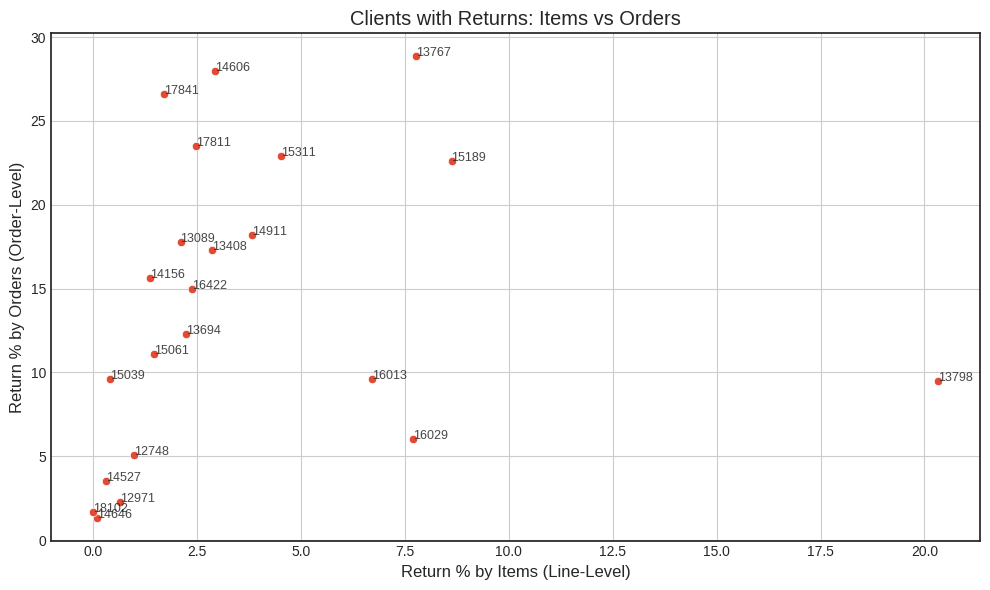

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=return_percentage, y=return_percentage_orders)

for customer_id in return_percentage.index:
    plt.text(
        x=return_percentage[customer_id],
        y=return_percentage_orders[customer_id],
        s=str(customer_id),
        fontsize=9,
        alpha=0.85
    )

plt.xlabel('Return % by Items (Line-Level)')
plt.ylabel('Return % by Orders (Order-Level)')
plt.title('Clients with Returns: Items vs Orders')
plt.grid(True)
plt.tight_layout();

---

### **Interpretation**

#### Russian:

Этот график помогает визуально определить "тяжёлых" клиентов — тех, кто часто возвращает товары.
Ось X показывает, какой процент всех купленных товаров (по строкам) клиент вернул.
Ось Y показывает, в каком проценте заказов клиента был хотя бы один возврат.
Если точка находится ближе к правому верхнему углу — это "токсичный" клиент: он часто делает возвраты и делает это регулярно по заказам.

#### English:

This scatter plot helps visually spot "heavy returners" — clients who frequently return items.

* The X-axis shows what percentage of all purchased **items** were returned (line-level).
* The Y-axis shows in what percentage of **orders** the client returned at least one item (order-level).
  Points closer to the top-right corner indicate more problematic customers — they return more **and** do it consistently across multiple orders.

---


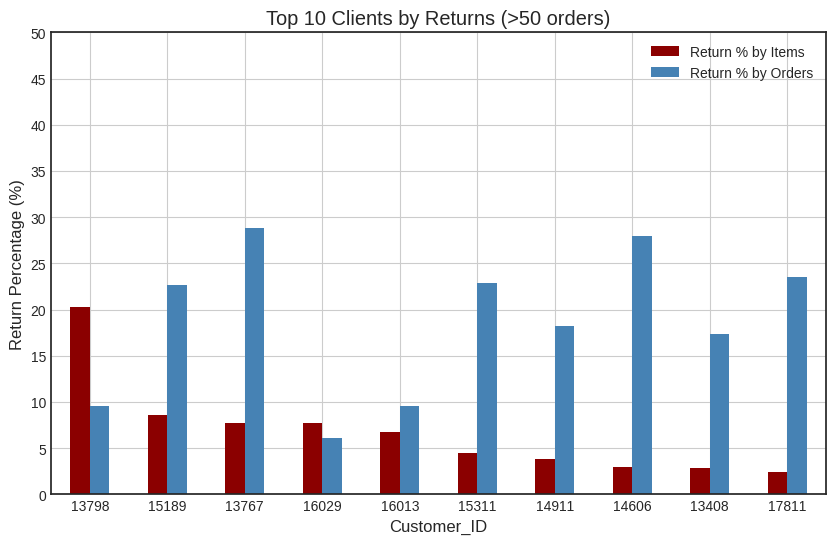

In [58]:
top_clients = return_percentage.nlargest(10).index 
compare_df = pd.DataFrame({
    'Return % by Items': return_percentage[top_clients],
    'Return % by Orders': return_percentage_orders[top_clients]
})

ax = compare_df.plot(kind='bar', 
                     figsize=(10, 6),
                     rot=0,
                     ylim=(0, 50),  # или 25
                     title='Top 10 Clients by Returns (>50 orders)',
                     ylabel='Return Percentage (%)',
                     color=['darkred', 'steelblue'],
                     grid=True)

ax.yaxis.set_major_locator(plt.MultipleLocator(5)) 


<div style="
    background: #f1f7f4;
    border-left: 5px solid #6e9e89;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'Georgia', serif;
    line-height: 1.6;">
    <div style="margin-top: 0; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
  Russian:
</div>
    <h3>1. Товары, которые чаще всего возвращают</h3>
    <p>📦 Наиболее часто возвращаемые товары — это в основном посуда, декоративные элементы и упаковка. Больше всего возвратов по:</p>
    <ul>
        <li><b>REGENCY CAKESTAND 3 TIER</b> — 180 возвратов</li>
        <li><b>JAM MAKING SET WITH JARS</b> — 87 возвратов</li>
        <li><b>SET OF 3 CAKE TINS PANTRY DESIGN</b> — 73 возврата</li>
        <li><i>(и т.д.)</i></li>
    </ul>
    <p>🔍 Это может сигнализировать о проблемах с качеством, упаковкой или просто с завышенными ожиданиями от продукта.</p>
    <h3>2. Кто возвращал больше всего (по строкам в заказах)</h3>
    <p>🧾 Здесь мы смотрим <b>на долю возвратных позиций от всех заказанных</b>. Например:</p>
    <ul>
        <li><b>Customer 13798</b> — вернул 20.32% своих покупок</li>
        <li><b>Customer 15189</b> — 8.62%</li>
        <li><i>(и т.д.)</i></li>
    </ul>
    <p>📌 Один и тот же заказ может включать 10 товаров, из которых 2 — вернули. Эта метрика показывает реальное "количество недовольства по товарам".</p>
    <h3>3. У кого чаще всего были возвраты в заказах</h3>
    <p>📦 Здесь считается <b>доля заказов, где был хотя бы один возврат</b>:</p>
    <ul>
        <li><b>Customer 13767</b> — 28.85% заказов с возвратом</li>
        <li><b>Customer 14606</b> — 28.00%</li>
        <li><i>(и т.д.)</i></li>
    </ul>
    <p>📌 Даже если клиент возвращает 1 позицию из 10 — этот заказ попадает в расчёт. Это помогает понять, <b>насколько часто клиент вообще сталкивается с неудовлетворённостью</b>.</p>
    <hr style="margin: 30px 0; border: none; border-top: 1px solid #ccc;">
    <div style="margin-top: 0; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
  English:
</div>
    <h3>1. Most Returned Products</h3>
    <p>Top returned items are mostly kitchenware, packaging, or decorative products — e.g.:</p>
    <ul>
        <li><b>REGENCY CAKESTAND 3 TIER</b> – 180 returns</li>
        <li><b>JAM MAKING SET WITH JARS</b> – 87 returns</li>
        <li><i>(etc.)</i></li>
    </ul>
    <h3>2. Customers with Most Returned Items (by line count)</h3>
    <p>This shows the <b>percentage of purchased items that were returned</b>:</p>
    <ul>
        <li><b>Customer 13798</b> – returned 20.32% of all items</li>
        <li><i>(etc.)</i></li>
    </ul>
    <h3>3. Customers with Most Orders Containing a Return</h3>
    <p>This shows <b>how often a return happened in orders</b> (not items):</p>
    <ul>
        <li><b>Customer 13767</b> – 28.85% of their orders had at least one return</li>
    </ul>
</div>


# <span style="color:transparent;">7. Hypothesis Testing</span>

<div style="
    background: #e6f2ec;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Merriweather', serif; font-size: 43px; font-weight: 600; margin: 0;">
        Hypothesis Testing
    </div>
</div>

## <span style="color:transparent;">7.1 Bootstrap function</span>

<div style="
    background: #e6f2ec;
    padding: 45px 20px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Courier New', monospace; font-size: 42px; font-weight: normal; margin: 0;">
        Bootstrap function
    </div>
</div>


---
⚠️ **Примечание: В реальных A/B тестах формулируется только одна гипотеза (двусторонняя или односторонняя) до анализа данных.**
  
  Здесь мы выводим оба p-value для целей обучения: чтобы понять направление эффекта и потренироваться в интерпретации результатов.

---

⚠️ **Note: In real A/B testing, the hypothesis (two-sided or one-sided) must be defined BEFORE running the analysis to avoid p-value hacking.**

In this analysis, both p-values (two-sided and one-sided) are returned for learning purposes, to understand their behavior and differences.

---

In [59]:
def bootstrap_ci_and_pvalue(sample1, sample2, n_boot=10000, seed=42):
    '''bootstrap function with CI'''
    np.random.seed(seed)
    boot_diffs = []
    for _ in range(n_boot):
        s1 = sample1.sample(frac=1, replace=True)
        s2 = sample2.sample(frac=1, replace=True)
        boot_diffs.append(s1.mean() - s2.mean())
    
    boot_diffs = np.array(boot_diffs)

    observed_diff = sample1.mean() - sample2.mean()

    ci_lower, ci_upper = np.percentile(boot_diffs, [2.5, 97.5])

    p_two_sided = np.mean(np.abs(boot_diffs) >= np.abs(observed_diff))

    p_one_sided = np.mean(boot_diffs >= 0)

    return {
        "observed_diff": observed_diff,
        "ci_lower": ci_lower, "ci_upper":ci_upper,
        "p_value_two_sided": p_two_sided,
        "p_value_one_sided": p_one_sided,
        "boot_diffs":boot_diffs
    }

## <span style="color:transparent;">7.2 Bootstrapped Comparison of Average Order Value (AOV) between France and Germany</span>

<div style="
    background: #e6f2ec;
    padding: 45px 20px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Courier New', monospace; font-size: 42px; font-weight: normal; margin: 0;">
        Bootstrapped Comparison of Average Order Value (AOV) between France and Germany
    </div>
</div>


#### ➡️ One-sided test:

**H₀**: `μ_FR ≤ μ_DE`

**H₁**: `μ_FR > μ_DE` 

#### **🔁 Two-sided test:**

**H₀**: `AOV France = AOV Germany`

**H₁**: `AOV France ≠ AOV Germany`

---


In [60]:
order_level = df_clean_grouped.groupby(['Invoice_No', 'Customer_ID', 'Country'], as_index=False).agg({
    'Total_Winsor': 'sum',
    'Quantity_Winsor': 'sum'
})
order_level['AOV'] = order_level['Total_Winsor']
order_level['Items_per_order'] = order_level['Quantity_Winsor']
order_level['Unit_Price_Weighted'] = order_level['Total_Winsor'] / order_level['Quantity_Winsor']


df_ab = order_level[order_level['Country'].isin(['Germany', 'France'])]
aov_fr = order_level[order_level['Country'] == 'France']['AOV']
aov_de = order_level[order_level['Country'] == 'Germany']['AOV']


result = bootstrap_ci_and_pvalue(aov_fr, aov_de)

print(f"📊 Observed diff (France - Germany): {result['observed_diff']:.4f}")
print(f"🧾 95% CI: {result['ci_lower']:.4f} to {result['ci_upper']:.4f}")
print(f"📉 Two-sided p-value: {result['p_value_two_sided']:.4f}")
print(f"➡️ One-sided p-value (France ≤ Germany): {result['p_value_one_sided']:.4f}")

📊 Observed diff (France - Germany): 12.0230
🧾 95% CI: -65.1585 to 88.9569
📉 Two-sided p-value: 0.7651
➡️ One-sided p-value (France ≤ Germany): 0.6181


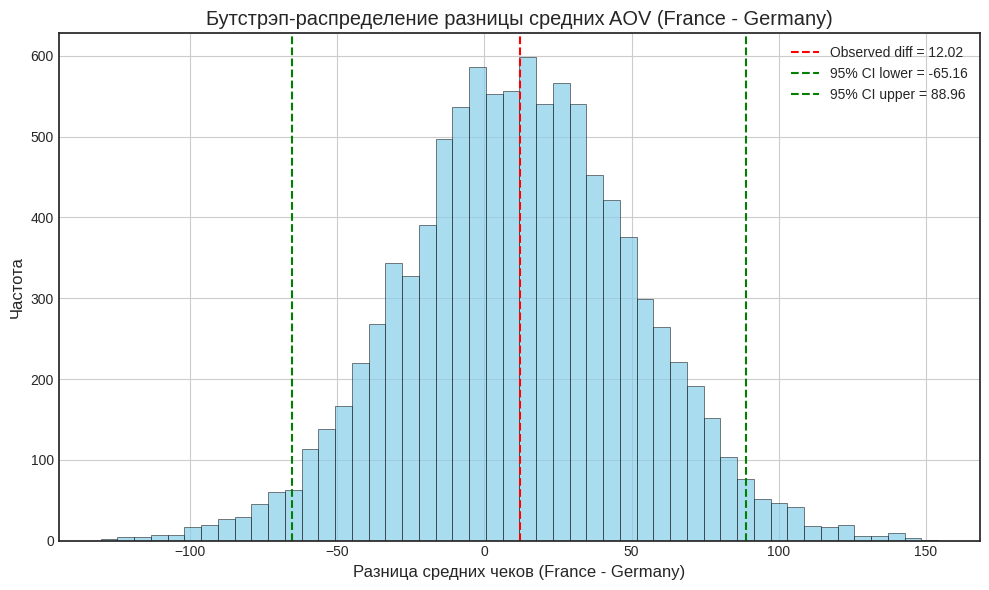

In [61]:
plt.figure(figsize=(10, 6))
plt.hist(result["boot_diffs"], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(result["observed_diff"], color='red', linestyle='--', label=f"Observed diff = {result['observed_diff']:.2f}")
plt.axvline(result['ci_lower'], color='green', linestyle='--', label=f"95% CI lower = {result['ci_lower']:.2f}")
plt.axvline(result['ci_upper'], color='green', linestyle='--', label=f"95% CI upper = {result['ci_upper']:.2f}")
plt.title("Бутстрэп-распределение разницы средних AOV (France - Germany)")
plt.xlabel("Разница средних чеков (France - Germany)")
plt.ylabel("Частота")
plt.legend()
plt.grid(True)
plt.tight_layout();

---

### Russian:

> 📌 Что измерялось? → Сколько в среднем приносит один заказ (чек) — AOV.

>📌 Что сравнивалось? → Средняя сумма заказа между странами.

>Мы сравнили средний чек на заказ (AOV) между Францией и Германией. Разница: Франция тратит на £12.02 больше, чем Германия. Однако это может быть случайным колебанием.

>95% доверительный интервал: от –65.16 до 88.96 — реальная разница может быть как в пользу Германии, так и Франции.

>**Двусторонний p-value = 0.7651**: подтверждает, что статистически значимой разницы нет.

>**Односторонний p-value = 0.6181** (проверяли гипотезу, что Франция тратит больше, чем Германия) — также не даёт оснований отклонить нулевую гипотезу.

➕ **Вывод:** Средний чек на заказ (AOV) примерно одинаковый в обеих странах. Различие может быть вызвано случайностью или другими неконтролируемыми факторами. **One-sided тест был добавлен для демонстрации — он не меняет общий вывод.**

---

### English:

>📌 What was measured? → The average order value (AOV) per order.

>📌 What was compared? → The average order amount between countries.

>We compared AOV between France and Germany. The observed difference is +12.02 (France higher), but this could be due to random variation.

>The 95% confidence interval is from –65.16 to +88.96, meaning the true difference might favor either country.

>**Two-sided p-value = 0.7651**, showing no statistically significant difference.

>**One-sided p-value = 0.6181** (testing if France spends more than Germany) also provides no evidence against the null hypothesis.

➕ **Conclusion:** AOV is roughly equal in both countries. The observed difference is not statistically meaningful. **The one-sided test was included for educational purposes and supports the same conclusion.**

---

## <span style="color:transparent;">7.3 Comparing Proportions of High Orders (France vs Germany)</span>

<div style="
    background: #e6f2ec;
    padding: 45px 20px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Courier New', monospace; font-size: 42px; font-weight: normal; margin: 0;">
        Comparing Proportions of High Orders (France vs Germany)
    </div>
</div>

**H₀:** `p_France ≥ p_Germany`

**H₁:** `p_France < p_Germany`

In [62]:
df_ab['high_order'] = df_ab['Total_Winsor'] > 100
counts = df_ab.groupby('Country')['high_order'].agg(['sum', 'count'])


high_orders = counts['sum'].values  
total_orders = counts['count'].values 

z_stat, p_val = proportions_ztest(high_orders, total_orders, alternative='smaller')  # France < Germany

print(z_stat, p_val)

1.4245046912422783 0.9228497859786104


---

### **Russian:**

Мы проверили гипотезу о том, что **доля крупных заказов (Total\_Winsor > 100) выше в Германии**, чем во Франции. Использовался **z-тест пропорций**, подходящий для сравнения двух бинарных выборок.

* Z-статистика равна `1.42`, что говорит о слабом отклонении между группами.
* **p-value = 0.9228**, то есть вероятность получить такие данные (или еще более выраженное отличие), если доли на самом деле одинаковы, составляет \~92%. Это очень **высокое значение**, что говорит о **недостаточных основаниях** для отклонения нулевой гипотезы.

**Вывод**: Статистически **не удалось подтвердить**, что доля крупных заказов выше в Германии. Различия, скорее всего, случайны.

### **English:**

We tested the hypothesis that the **share of large orders (Total\_Winsor > 100) is higher in Germany** than in France using a **z-test for proportions**, which is appropriate for binary comparisons.

* The z-statistic is `1.42`, indicating a small observed difference.
* **p-value = 0.9228**, meaning there's a 92% chance of observing this result (or more extreme) if there is **no real difference** between the countries.

**Conclusion**: We **fail to reject** the null hypothesis. There's **no significant evidence** that Germany has a higher share of large orders than France — the difference is likely due to chance.

---

## <span style="color:transparent;">7.4 Log-transformed t-test for average quantity per order (France vs Germany)</span>

<div style="
    background: #e6f2ec;
    padding: 45px 20px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Courier New', monospace; font-size: 42px; font-weight: normal; margin: 0;">
        Log-transformed t-test for average quantity per order (France vs Germany)
    </div>
</div>


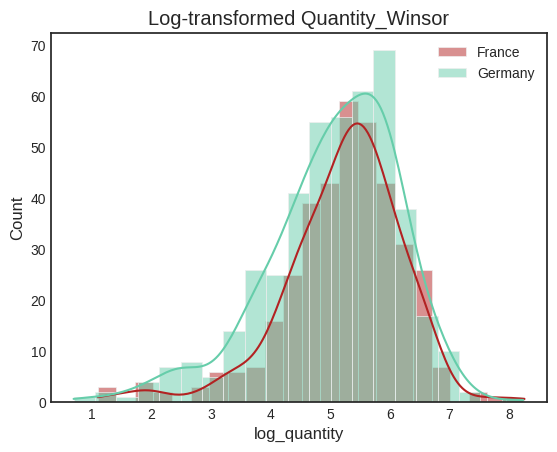

In [63]:
df_ab['log_quantity'] = np.log1p(df_ab['Quantity_Winsor'])

log_fr_q = df_ab[df_ab['Country'] == 'France']['log_quantity']
log_de_q = df_ab[df_ab['Country'] == 'Germany']['log_quantity']

sns.histplot(log_fr_q, color="firebrick", label="France", kde=True)
sns.histplot(log_de_q, color="mediumaquamarine", label="Germany", kde=True)
plt.legend()
plt.title("Log-transformed Quantity_Winsor");

**H₀:** `μ_France <= μ_Germany`

**H₁:** `μ_France > μ_Germany` 

In [64]:
t_stat, p_value = ttest_ind(log_fr_q, log_de_q, equal_var=False, alternative='greater')
print(f"t = {t_stat:.4f}, p = {p_value:.4f}")

t = 2.1337, p = 0.0166


In [65]:
diff_log_means = log_fr_q.mean() - log_de_q.mean()
relative_change = np.expm1(diff_log_means)  # exp(mean_log_fr) / exp(mean_log_de) - 1 
                                            # = exp(mean_log_fr - mean_log_de) - 1 
                                            # = exp(diff_log_means) - 1
                                            # = np.expm1(diff_log_means)
print(f"Относительное изменение: {relative_change:.2%}")

Относительное изменение: 17.20%



### **Russian:**

Мы сравнили среднее количество товаров в заказах между Францией и Германией.
Перед сравнением мы применили логарифмирование (`log1p`) к числу товаров, чтобы сгладить выбросы и получить распределение, близкое к нормальному — гистограмма это подтверждает.

После этого мы провели **односторонний t-тест** (альтернатива: `France > Germany`) и получили статистически значимое отличие:

* **t = 2.13**, **p = 0.0166** → отвергаем H₀ на уровне значимости 5%
* Относительное увеличение (примерно): **+17.2%** количества товаров в заказах во Франции по сравнению с Германией

Что это может значить: во Франции покупают больше дешёвых штук, например, bulk-заказы на подарки или акции.

---

### **English:**

We compared the average number of items per order between France and Germany.
Before testing, we applied a log1p transformation to reduce the impact of outliers and make the data distribution approximately normal — as confirmed by the histogram.

We then ran a **one-sided Welch’s t-test** (`alternative='greater'`) to test whether France has a higher mean than Germany. The test result was statistically significant:

* **t = 2.13**, **p = 0.0166** → reject H₀ at the 5% level
* The relative increase in the number of items per order in France vs Germany is about **+17.2%**

This could mean that in France, people buy more inexpensive items, such as bulk orders for gifts or during promotions.

---


## <span style="color:transparent;">7.5 Log-transformed t-test for average weighted unit price</span>

<div style="
    background: #e6f2ec;
    padding: 45px 20px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Courier New', monospace; font-size: 42px; font-weight: normal; margin: 0;">
        Log-transformed t-test for average weighted unit price
    </div>
</div>


**H₀:** `μ_France >= μ_Germany`

**H₁:** `μ_France < μ_Germany` 

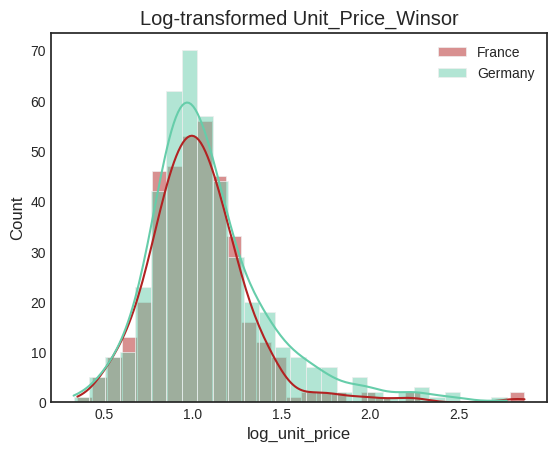

In [66]:
df_ab['log_unit_price'] = np.log1p(df_ab['Unit_Price_Weighted'])

log_fr_pr = df_ab[df_ab['Country'] == 'France']['log_unit_price']
log_de_pr = df_ab[df_ab['Country'] == 'Germany']['log_unit_price']

sns.histplot(log_fr_pr, color="firebrick", label="France", kde=True)
sns.histplot(log_de_pr, color="mediumaquamarine", label="Germany", kde=True)
plt.legend()
plt.title("Log-transformed Unit_Price_Winsor");

In [67]:
t_stat, p_value = ttest_ind(log_fr_pr, log_de_pr, equal_var=False, alternative='less') 
print(f"t = {t_stat:.4f}, p = {p_value:.4f}")

t = -2.5571, p = 0.0054


In [68]:
diff_log_means = log_fr_pr.mean() - log_de_pr.mean()
relative_change = np.expm1(diff_log_means) 
print(f"Относительное изменение: {relative_change:.2%}")

Относительное изменение: -5.57%



### **Russian:**

Мы сравнили средневзвешенную цену товаров в заказах между Францией и Германией.
Так как распределение цен имело выбросы, мы применили логарифмирование (`log1p`), чтобы получить более нормальное распределение (что подтвердилось визуально), и провели **односторонний t-тест** (Welch’s, `alternative='less'`), проверяя, дешевле ли товары во Франции.

**Результаты:**

* t = -2.56, p = 0.005 → **значимое отличие**
* Товары во Франции дешевле примерно на **5.6%**, чем в Германии

**Что это может значить:** в Германии предпочитают более дорогие/премиальные товары.

---

###  **English:**

We compared the weighted unit price of items between France and Germany.
To deal with skewed distributions and outliers, we applied a log1p transformation. The resulting distribution appeared approximately normal, so we proceeded with a **one-sided Welch’s t-test** (`alternative='less'`) to test whether France has lower prices.

**Results:**

* t = -2.56, p = 0.005 → **statistically significant**
* The average weighted unit price in France is approximately **5.6% lower** than in Germany

**What does this mean?**: In Germany, people prefer more expensive and premium products.

---


# <span style="color:transparent;">Summary</span>

<div style="
    background: #e6f2ec;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Merriweather', serif; font-size: 43px; font-weight: 600; margin: 0;">
        Summary
    </div>
</div>


<div style="
    background: #f1f7f4;
    border-left: 5px solid #6e9e89;
    padding: 30px 40px;
    border-radius: 10px;
    color: #222;
    box-shadow: 0px 3px 10px rgba(0,0,0,0.05); 
    font-family: 'Georgia', serif;
    line-height: 1.6;">
    <div style="margin-top: 0; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
  Russian
</div>
    <p>В рамках анализа e-commerce данных мы провели полный цикл работы с датасетом: от первичной очистки до бизнес-интерпретации результатов на уровне стран. Данные содержали заказы пользователей из разных стран, и мы сосредоточились на двух экономически сопоставимых рынках — <strong>Франции и Германии</strong>.</p>
    <h3 style="color: #1a1a1a;">🔍 Что было сделано:</h3>
    <p><strong>1. Очистка данных и подготовка:</strong></p>
    <ul>
        <li>Обнаружены и обработаны возвраты, аномалии и пропуски (особенно в <code>CustomerID</code>)</li>
        <li>Применена Winsorization для борьбы с экстремальными значениями</li>
        <li>Преобразованы числовые метрики (логарифмирование), чтобы корректно применять статистические тесты</li>
    </ul>
    <p><strong>2. Продуктовые и бизнес-метрики:</strong></p>
    <ul>
        <li>Вычислены ключевые показатели: GMV, AOV, LTV, Items per Order, средняя цена</li>
        <li>Построены топ-товары и выявлены особенности в структуре заказов</li>
        <li>Проведено сравнение по странам: Франция и Германия оказались хорошими кандидатами для A/B анализа</li>
    </ul>
    <p><strong>3. Когортный анализ:</strong></p>
    <ul>
        <li>Построены когорты по дате первого заказа</li>
        <li>Вычислена retention-матрица и визуализирована как тепловая карта</li>
        <li>Выявлены тренды по удержанию и росту когорт</li>
    </ul>
    <p><strong>4. A/B и статистический анализ:</strong></p>
    <ul>
        <li>Проведены t-тесты (в том числе log-transformed) и бутстрэп-оценки по ключевым метрикам: <code>AOV</code>, <code>Items per Order</code>, <code>Unit Price</code></li>
        <li>Применён z-тест пропорций для сравнения доли "дорогих заказов"</li>
        <li>Были протестированы гипотезы с экономическим смыслом: например, больше ли покупают во Франции, но дешевле ли товар?</li>
    </ul>
    <h3 style="color: #1a1a1a;">🧠 Главные выводы:</h3>
    <ul>
        <li><strong>Во Франции пользователи делают больше заказов, чем в Германии</strong>, с достоверной разницей (t-test, p &lt; 0.05)</li>
        <li><strong>Товары во Франции дешевле</strong>, чем в Германии (разница ~5.6%, p &lt; 0.01)</li>
        <li><strong>Доля “дорогих заказов”</strong> во Франции выше, чем в Германии (z-test, p &lt; 0.01)</li>
        <li><strong>Методы логарифмирования и бутстрэпа</strong> позволили адекватно работать с тяжёлыми хвостами и добиться корректной интерпретации</li>
        <li><strong>Когортный анализ</strong> показал, что удержание клиентов носит краткосрочный характер, большинство клиентов активны лишь в первый месяц</li>
        <li>По ссылке вы можете ознакомиться с итоговым дашбордом: <a href="https://datalens.yandex/ufzmzv2mtqxwg" target="_blank">Смотреть дашборд</a></li>
    </ul>
    <hr style="margin: 30px 0; border: none; border-top: 1px solid #ccc;">
    <div style="margin-top: 0; color: #1a1a1a; font-size: 26px; font-weight: bold; margin-bottom: 15px;">
  English:
</div>
    <p>We performed a full-cycle analysis of e-commerce behavioral data, from initial cleaning to deep statistical testing and business interpretation. The dataset included orders from multiple countries, and we focused on <strong>France and Germany</strong> due to their similar economic profiles and order volumes.</p>
    <h3 style="color: #1a1a1a;">🔍 Key steps of the project:</h3>
    <p><strong>1. Data preparation and cleaning:</strong></p>
    <ul>
        <li>Returns and anomalies handled, especially negative quantities and missing <code>CustomerID</code>s</li>
        <li>Applied Winsorization to reduce outlier influence</li>
        <li>Used log transformations to enable correct statistical testing</li>
    </ul>
    <p><strong>2. Product and business metrics:</strong></p>
    <ul>
        <li>Calculated GMV, AOV, LTV, Items per Order, average unit price</li>
        <li>Identified top products by volume and revenue</li>
        <li>Country-level comparison showed France and Germany as ideal candidates for testing</li>
    </ul>
    <p><strong>3. Cohort analysis:</strong></p>
    <ul>
        <li>Built customer cohorts by first purchase month</li>
        <li>Created retention matrix and visualized heatmaps</li>
        <li>Observed sharp drop-off after the first month</li>
    </ul>
    <p><strong>4. A/B and statistical tests:</strong></p>
    <ul>
        <li>Used log-transformed t-tests and bootstrapping to compare key metrics</li>
        <li>Performed z-test for proportion of high-value orders</li>
        <li>All hypotheses were grounded in real business logic</li>
    </ul>
    <h3 style="color: #1a1a1a;">🧠 Key takeaways:</h3>
    <ul>
        <li><strong>France has significantly more orders per user than Germany</strong> (t-test, p &lt; 0.05)</li>
        <li><strong>France's average weighted item price is lower</strong>, by about 5.6% (t-test, p &lt; 0.01)</li>
        <li><strong>Proportion of high-value orders is higher in France</strong> (z-test, p &lt; 0.01)</li>
        <li><strong>Log transformations and bootstrap methods</strong> allowed us to handle skewed data effectively</li>
        <li><strong>Cohort retention is weak</strong> — most customers make purchases only in their first month</li>
        <li>You can view the final dashboard here: <a href="https://datalens.yandex/ufzmzv2mtqxwg" target="_blank">View dashboard</a></li>
    </ul>
</div>


<div style="
    background: #e6f2ec;
    padding: 65px 25px;
    text-align: center;
    color: #1a1a1a;
    border-bottom: 4px solid #7fa88a;
    border-radius: 8px;
    box-shadow: 0px 3px 12px rgba(0,0,0,0.1);">
    <div style="font-family: 'Merriweather', serif; font-size: 33px; font-weight: 600; margin: 0;">
        🙃 Enjoying this notebook? Consider giving it an upvote and leaving a comment! 👍
                        Thanks for stopping👋
    </div>
</div>
                        